# Ejercicios Adicionales - Unidades 1 a 5
## Cátedra Bianco - Profesora Natalia Salaberry

---

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display, Math
import sympy as sp

# Configuración
np.set_printoptions(precision=4, suppress=True)
pd.set_option('display.precision', 4)

# Ejercicio 1 - Probabilidad con Tablas de Contingencia

**Enunciado:**

En una localidad se releva información sobre bienes en 1000 hogares, obteniéndose los siguientes resultados:
- 10% tienen auto y bicicleta
- 40% no tienen auto ni bicicleta
- 30% tienen bicicleta

Para una familia seleccionada al azar, calcular:
- a) La probabilidad de que tenga auto
- b) La probabilidad de que tenga bicicleta si tiene auto
- c) La probabilidad de que tenga auto, pero no bicicleta
- d) Los eventos tener auto y tener bicicleta, ¿son mutuamente excluyentes? ¿son independientes?

**Respuestas:** a) 40% b) 25% c) 30% d) No son mutuamente excluyentes, No son independientes

**Definir eventos y datos conocidos:**

- **Eventos:**
  - A: Tener auto
  - B: Tener bicicleta

- **Datos:**
  - P(A ∩ B) = 0,10 (tienen auto Y bicicleta)
  - P(A' ∩ B') = 0,40 (NO tienen auto NI bicicleta)
  - P(B) = 0,30 (tienen bicicleta)

In [194]:
# Datos conocidos
p_a_y_b = 0.10      # P(A ∩ B) - tienen auto Y bicicleta
p_no_a_no_b = 0.40  # P(A' ∩ B') - NO tienen auto NI bicicleta
p_b = 0.30          # P(B) - tienen bicicleta

print("📊 Datos conocidos:")
print(f"P(A ∩ B) = {p_a_y_b:.4f} (auto Y bicicleta)")
print(f"P(A' ∩ B') = {p_no_a_no_b:.4f} (NO auto NI bicicleta)")
print(f"P(B) = {p_b:.4f} (bicicleta)")

📊 Datos conocidos:
P(A ∩ B) = 0.1000 (auto Y bicicleta)
P(A' ∩ B') = 0.4000 (NO auto NI bicicleta)
P(B) = 0.3000 (bicicleta)


**Calcular las probabilidades faltantes:**

De P(B) = 0,30 y P(A ∩ B) = 0,10:

$$P(B) = P(A \cap B) + P(A' \cap B)$$
$$0,30 = 0,10 + P(A' \cap B)$$
$$P(A' \cap B) = 0,20$$

Por complemento:
$$P(A' \cap B') + P(A' \cap B) + P(A \cap B') + P(A \cap B) = 1$$
$$0,40 + 0,20 + P(A \cap B') + 0,10 = 1$$
$$P(A \cap B') = 0,30$$

Entonces:
$$P(A) = P(A \cap B) + P(A \cap B') = 0,10 + 0,30 = 0,40$$

In [195]:
# Calcular probabilidades faltantes
# P(B) = P(A ∩ B) + P(A' ∩ B)
p_no_a_y_b = p_b - p_a_y_b  # P(A' ∩ B) = P(B) - P(A ∩ B)

# P(A ∩ B') = 1 - P(A' ∩ B') - P(A' ∩ B) - P(A ∩ B)
p_a_y_no_b = 1 - p_no_a_no_b - p_no_a_y_b - p_a_y_b

# P(A) = P(A ∩ B) + P(A ∩ B')
p_a = p_a_y_b + p_a_y_no_b

# P(A') y P(B') por complemento
p_no_a = 1 - p_a
p_no_b = 1 - p_b

print("📐 Probabilidades calculadas:")
print(f"P(A' ∩ B) = {p_no_a_y_b:.4f} (NO auto Y bicicleta)")
print(f"P(A ∩ B') = {p_a_y_no_b:.4f} (auto Y NO bicicleta)")
print(f"P(A) = {p_a:.4f} (auto)")
print(f"P(A') = {p_no_a:.4f} (NO auto)")
print(f"P(B') = {p_no_b:.4f} (NO bicicleta)")

📐 Probabilidades calculadas:
P(A' ∩ B) = 0.2000 (NO auto Y bicicleta)
P(A ∩ B') = 0.3000 (auto Y NO bicicleta)
P(A) = 0.4000 (auto)
P(A') = 0.6000 (NO auto)
P(B') = 0.7000 (NO bicicleta)


**Tabla de contingencia (probabilidades):**

In [196]:
# Crear tabla de contingencia con probabilidades
tabla_prob = pd.DataFrame(
    {
        'Tiene Bicicleta (B)': [p_a_y_b, p_no_a_y_b, p_b],
        'No Bicicleta (B\')': [p_a_y_no_b, p_no_a_no_b, p_no_b],
        'Total': [p_a, p_no_a, 1.0]
    },
    index=['Tiene Auto (A)', 'No Auto (A\')', 'Total']
)

print("\n📊 TABLA DE CONTINGENCIA (Probabilidades)")
print("="*60)
display(tabla_prob)
print("="*60)


📊 TABLA DE CONTINGENCIA (Probabilidades)


,Tiene Bicicleta (B),No Bicicleta (B'),Total
Tiene Auto (A),0.1,0.3,0.4
No Auto (A'),0.2,0.4,0.6
Total,0.3,0.7,1.0


**Tabla de contingencia (frecuencias para 1000 hogares):**

In [197]:
# Crear tabla de contingencia con frecuencias (1000 hogares)
n = 1000
tabla_frec = pd.DataFrame(
    {
        'Tiene Bicicleta (B)': [int(p_a_y_b*n), int(p_no_a_y_b*n), int(p_b*n)],
        'No Bicicleta (B\')': [int(p_a_y_no_b*n), int(p_no_a_no_b*n), int(p_no_b*n)],
        'Total': [int(p_a*n), int(p_no_a*n), n]
    },
    index=['Tiene Auto (A)', 'No Auto (A\')', 'Total']
)

print("\n📊 TABLA DE CONTINGENCIA (Frecuencias en 1000 hogares)")
print("="*60)
display(tabla_frec)
print("="*60)


📊 TABLA DE CONTINGENCIA (Frecuencias en 1000 hogares)


,Tiene Bicicleta (B),No Bicicleta (B'),Total
Tiene Auto (A),100,300,400
No Auto (A'),199,400,600
Total,300,700,1000


### Inciso a) La probabilidad de que tenga auto

$$P(A) = P(A \cap B) + P(A \cap B')$$

In [198]:
# Inciso a)
print("="*60)
display(Math(r'P(A) = P(A \cap B) + P(A \cap B\prime)'))
display(Math(r'P(A) = ' + f'{p_a_y_b}' + r' + ' + f'{p_a_y_no_b}' + r' = ' + f'{p_a}'))
print(f"\n✅ P(A) = {p_a:.4f}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>


✅ P(A) = 0.4000


### Inciso b) La probabilidad de que tenga bicicleta si tiene auto

**Probabilidad condicional:**
$$P(B|A) = \frac{P(A \cap B)}{P(A)}$$

In [199]:
# Inciso b)
p_b_dado_a = p_a_y_b / p_a

print("="*60)
display(Math(r'P(B|A) = \frac{P(A \cap B)}{P(A)}'))
display(Math(r'P(B|A) = \frac{' + f'{p_a_y_b}' + r'}{' + f'{p_a}' + r'} = ' + f'{p_b_dado_a:.4f}'))
print(f"\n✅ P(B|A) = {p_b_dado_a:.4f}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>


✅ P(B|A) = 0.2500


### Inciso c) La probabilidad de que tenga auto, pero no bicicleta

$$P(A \cap B') = P(A) - P(A \cap B)$$

In [200]:
# Inciso c)
print("="*60)
display(Math(r'P(A \cap B\prime) = P(A) - P(A \cap B)'))
display(Math(r'P(A \cap B\prime) = ' + f'{p_a}' + r' - ' + f'{p_a_y_b}' + r' = ' + f'{p_a_y_no_b}'))
print(f"\n✅ P(A ∩ B') = {p_a_y_no_b:.4f}")

<IPython.core.display.Math object>

<IPython.core.display.Math object>


✅ P(A ∩ B') = 0.3000


### Inciso d) ¿Son mutuamente excluyentes? ¿Son independientes?

**Eventos Mutuamente Excluyentes:**

Dos eventos A y B son **mutuamente excluyentes** si:
$$P(A \cap B) = 0$$

**Eventos Independientes:**

Dos eventos A y B son **independientes** si:
$$P(A \cap B) = P(A) \cdot P(B)$$

In [201]:
# Inciso d)
print("="*60)

# Verificar si son mutuamente excluyentes
print("\n**1. Mutuamente excluyentes:**")
display(Math(r'\text{Condición: } P(A \cap B) = 0'))
print(f"P(A ∩ B) = {p_a_y_b:.4f}")

if p_a_y_b == 0:
    print("✅ SON mutuamente excluyentes")
else:
    print("❌ NO son mutuamente excluyentes")

# Verificar independencia
print("\n**2. Independencia:**")
display(Math(r'\text{Condición: } P(A \cap B) = P(A) \cdot P(B)'))

p_a_por_p_b = p_a * p_b
print(f"P(A ∩ B) = {p_a_y_b:.4f}")
print(f"P(A) × P(B) = {p_a:.4f} × {p_b:.4f} = {p_a_por_p_b:.4f}")

if abs(p_a_y_b - p_a_por_p_b) < 0.0001:
    print("✅ SON independientes")
else:
    print("❌ NO son independientes")


**1. Mutuamente excluyentes:**


<IPython.core.display.Math object>

P(A ∩ B) = 0.1000
❌ NO son mutuamente excluyentes

**2. Independencia:**


<IPython.core.display.Math object>

P(A ∩ B) = 0.1000
P(A) × P(B) = 0.4000 × 0.3000 = 0.1200
❌ NO son independientes


### Resumen de Resultados

In [202]:
# Resumen final
print("\n" + "="*60)
print("📊 RESUMEN DE RESULTADOS")
print("="*60)

resultados = pd.DataFrame({
    'Inciso': ['a)', 'b)', 'c)', 'd)'],
    'Pregunta': [
        'P(A) - Tener auto',
        'P(B|A) - Bicicleta dado auto',
        'P(A ∩ B\') - Auto sin bicicleta',
        'Mutuamente excl. / Independientes'
    ],
    'Resultado': [
        f'{p_a:.4f}',
        f'{p_b_dado_a:.4f}',
        f'{p_a_y_no_b:.4f}',
        'NO / NO'
    ]
})

display(resultados)
print("="*60)


📊 RESUMEN DE RESULTADOS


,Inciso,Pregunta,Resultado
0,a),P(A) - Tener auto,0.4000
1,b),P(B|A) - Bicicleta dado auto,0.2500
2,c),P(A ∩ B') - Auto sin bicicleta,0.3000
3,d),Mutuamente excl. / Independientes,NO / NO


# Ejercicio 2 - Distribución de Poisson

**Enunciado:**

Los mensajes que llegan a una computadora utilizada como servidor lo hacen a un promedio de 0.1 mensajes por minuto. ¿Cuál es la probabilidad de que lleguen como mucho 2 mensajes en una hora?

**Respuesta:** 6,2% (6,1969×10⁻²)

**Definir la variable aleatoria y parámetros:**

- **Variable aleatoria:** X = número de mensajes que llegan en 1 hora
- **Distribución:** Poisson, ya que estamos contando eventos (mensajes) en un intervalo de tiempo
- **Datos:**
  - λ = 0,1 mensajes/minuto (tasa promedio)
  - Intervalo: 1 hora = 60 minutos
  - λ_hora = 0,1 × 60 = 6 mensajes/hora

**Pregunta:** P(X ≤ 2) = ?

**Modelo de Poisson:**
$$P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}$$

$$P(X \leq 2) = P(X=0) + P(X=1) + P(X=2)$$

In [203]:
# Parámetros del problema
lambda_minuto = 0.1  # mensajes por minuto
tiempo_horas = 1     # 1 hora
tiempo_minutos = 60  # 60 minutos en 1 hora

# Calcular lambda para 1 hora
lambda_hora = lambda_minuto * tiempo_minutos

print("📊 Parámetros del problema:")
print(f"Tasa promedio: λ = {lambda_minuto} mensajes/minuto")
print(f"Intervalo de tiempo: {tiempo_horas} hora = {tiempo_minutos} minutos")
print(f"Tasa ajustada: λ_hora = {lambda_hora:.2f} mensajes/hora")
print(f"\nDistribución: X ~ Poisson({lambda_hora:.2f})")

📊 Parámetros del problema:
Tasa promedio: λ = 0.1 mensajes/minuto
Intervalo de tiempo: 1 hora = 60 minutos
Tasa ajustada: λ_hora = 6.00 mensajes/hora

Distribución: X ~ Poisson(6.00)


**Calcular P(X ≤ 2):**

Usando la función de distribución acumulada (CDF) de Poisson:

$$P(X \leq 2) = \sum_{k=0}^{2} \frac{e^{-6} \cdot 6^k}{k!}$$

In [204]:
# Método 1: Usando scipy.stats
from scipy.stats import poisson

# Calcular P(X ≤ 2) usando la función CDF
prob_acumulada = poisson.cdf(2, lambda_hora)

print("="*60)
print("📐 Cálculo con scipy.stats.poisson:")
print("="*60)
print(f"P(X ≤ 2) = {prob_acumulada:.4f}")
print(f"P(X ≤ 2) = {prob_acumulada:.6f}")
print(f"P(X ≤ 2) = {prob_acumulada:.4e}")  # Notación científica
print("="*60)

📐 Cálculo con scipy.stats.poisson:
P(X ≤ 2) = 0.0620
P(X ≤ 2) = 0.061969
P(X ≤ 2) = 6.1969e-02


**Verificación calculando cada probabilidad individual:**

$$P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}$$

In [205]:
# Método 2: Cálculo manual
import math

# Calcular cada probabilidad
p_0 = math.exp(-lambda_hora) * (lambda_hora**0) / math.factorial(0)
p_1 = math.exp(-lambda_hora) * (lambda_hora**1) / math.factorial(1)
p_2 = math.exp(-lambda_hora) * (lambda_hora**2) / math.factorial(2)

# Suma
p_total_manual = p_0 + p_1 + p_2

print("\n📐 Cálculo manual (verificación):")
print("="*60)
display(Math(r'P(X = 0) = \frac{e^{-6} \cdot 6^0}{0!} = ' + f'{p_0:.6f}'))
display(Math(r'P(X = 1) = \frac{e^{-6} \cdot 6^1}{1!} = ' + f'{p_1:.6f}'))
display(Math(r'P(X = 2) = \frac{e^{-6} \cdot 6^2}{2!} = ' + f'{p_2:.6f}'))
print()
display(Math(r'P(X \leq 2) = P(X=0) + P(X=1) + P(X=2)'))
display(Math(r'P(X \leq 2) = ' + f'{p_0:.6f}' + r' + ' + f'{p_1:.6f}' + r' + ' + f'{p_2:.6f}'))
display(Math(r'P(X \leq 2) = ' + f'{p_total_manual:.6f}'))
print()
print(f"P(X ≤ 2) = {p_total_manual:.4f}")
print("="*60)


📐 Cálculo manual (verificación):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


P(X ≤ 2) = 0.0620


**Tabla de distribución de probabilidad:**

In [206]:
# Crear tabla de probabilidades
k_valores = [0, 1, 2]
probabilidades = [p_0, p_1, p_2]
prob_acumuladas = [p_0, p_0 + p_1, p_0 + p_1 + p_2]

tabla_poisson = pd.DataFrame({
    'k (mensajes)': k_valores,
    'P(X = k)': probabilidades,
    'P(X ≤ k)': prob_acumuladas
})

print("\n📊 TABLA DE DISTRIBUCIÓN DE POISSON")
print("="*60)
display(tabla_poisson)
print("="*60)


📊 TABLA DE DISTRIBUCIÓN DE POISSON


,k (mensajes),P(X = k),P(X ≤ k)
0,0,0.0025,0.0025
1,1,0.0149,0.0174
2,2,0.0446,0.0620


### Resumen de Resultados

In [207]:
# Resumen final
print("\n" + "="*60)
print("📊 RESUMEN - EJERCICIO 2")
print("="*60)
print(f"Distribución: Poisson con λ = {lambda_hora:.2f} mensajes/hora")
print(f"\nPregunta: P(X ≤ 2) = ?")
print(f"\n✅ RESULTADO:")
print(f"   P(X ≤ 2) = {prob_acumulada:.4f}")
print(f"   P(X ≤ 2) = {prob_acumulada*100:.2f}%")
print(f"   P(X ≤ 2) = {prob_acumulada:.4e} (notación científica)")
print("="*60)


📊 RESUMEN - EJERCICIO 2
Distribución: Poisson con λ = 6.00 mensajes/hora

Pregunta: P(X ≤ 2) = ?

✅ RESULTADO:
   P(X ≤ 2) = 0.0620
   P(X ≤ 2) = 6.20%
   P(X ≤ 2) = 6.1969e-02 (notación científica)


# Ejercicio 3 - Distribución Normal

**Enunciado:**

En una determinada ciudad la temperatura es una variable aleatoria con media 18 grados y desvío estándar 2 grados.

- A) ¿Cuál es la probabilidad que un día la temperatura alcance como máximo los 25 grados?
- B) ¿Cuál es la temperatura mínima para al menos el 75% de los días?

**Respuestas:** A) 99,98% (0,9998) B) 19,348 grados

**Definir la variable aleatoria y parámetros:**

- **Variable aleatoria:** X = temperatura diaria (en grados)
- **Distribución:** Normal, X ~ N(μ, σ²)
- **Parámetros:**
  - μ = 18 grados (media)
  - σ = 2 grados (desvío estándar)
  
**Estandarización:**

Para cualquier valor x, usamos:
$$Z = \frac{X - \mu}{\sigma} \sim N(0, 1)$$

In [208]:
# Parámetros de la distribución
mu = 18     # Media (grados)
sigma = 2   # Desvío estándar (grados)

print("📊 Parámetros de la distribución:")
print(f"Media: μ = {mu:.2f} grados")
print(f"Desvío estándar: σ = {sigma:.2f} grados")
print(f"\nDistribución: X ~ N({mu:.2f}, {sigma**2:.2f})")
print(f"              X ~ N({mu:.2f}, {sigma:.2f}²)")

📊 Parámetros de la distribución:
Media: μ = 18.00 grados
Desvío estándar: σ = 2.00 grados

Distribución: X ~ N(18.00, 4.00)
              X ~ N(18.00, 2.00²)


### Inciso a) ¿Cuál es la probabilidad que un día la temperatura alcance como máximo los 25 grados?

**Pregunta:** P(X ≤ 25) = ?

**Estandarización:**
$$Z = \frac{X - \mu}{\sigma} = \frac{25 - 18}{2} = \frac{7}{2} = 3.5$$

**Cálculo:**
$$P(X \leq 25) = P\left(Z \leq \frac{25-18}{2}\right) = P(Z \leq 3.5)$$

In [209]:
# Inciso a)
from scipy.stats import norm

x_a = 25  # Temperatura máxima

# Estandarizar
z_a = (x_a - mu) / sigma

# Calcular P(X ≤ 25) = P(Z ≤ 3.5)
prob_a = norm.cdf(z_a)

print("="*60)
print("INCISO A: P(X ≤ 25)")
print("="*60)
display(Math(r'Z = \frac{X - \mu}{\sigma} = \frac{' + f'{x_a}' + r' - ' + f'{mu}' + r'}{' + f'{sigma}' + r'} = ' + f'{z_a:.2f}'))
print()
display(Math(r'P(X \leq 25) = P(Z \leq ' + f'{z_a:.2f}' + r')'))
print()
print(f"✅ P(X ≤ 25) = {prob_a:.4f}")
print(f"   P(X ≤ 25) = {prob_a*100:.2f}%")
print("="*60)

INCISO A: P(X ≤ 25)


<IPython.core.display.Math object>

<IPython.core.display.Math object>


✅ P(X ≤ 25) = 0.9998
   P(X ≤ 25) = 99.98%


### Inciso b) ¿Cuál es la temperatura mínima para al menos el 75% de los días?

**Pregunta:** Encontrar x tal que al menos el 75% de los días NO superen esa temperatura

**Reformulación:**
$$P(X \leq x) = 0.75$$

Necesitamos encontrar el **percentil 75** (cuartil Q₃):
$$P(X \leq x) = 0.75$$

**Estandarización:**
$$P\left(Z \leq \frac{x - \mu}{\sigma}\right) = 0.75$$

Donde Z es el valor crítico para el percentil 75 de la normal estándar.

In [210]:
# Inciso b)
# P(X ≤ x) = 0.75
# Necesitamos el percentil 75

prob_b = 0.75  # P(X ≤ x) = 0.75

# Encontrar el valor Z correspondiente al percentil 75
z_b = norm.ppf(prob_b)

# Des-estandarizar para encontrar x
# Z = (x - μ) / σ  →  x = μ + Z·σ
x_b = mu + z_b * sigma

print("\n" + "="*60)
print("INCISO B: Temperatura mínima para al menos 75% de los días")
print("="*60)
print("P(X ≤ x) = 0.75")
print()
print("Buscamos el percentil 75 (Q₃):")
display(Math(r'P(X \leq x) = 0.75'))
print()
print(f"Valor crítico de Z para p = {prob_b}: z = {z_b:.4f}")
print()
display(Math(r'x = \mu + z \cdot \sigma'))
display(Math(r'x = ' + f'{mu}' + r' + (' + f'{z_b:.4f}' + r') \cdot ' + f'{sigma}'))
display(Math(r'x = ' + f'{mu}' + r' + ' + f'{z_b * sigma:.3f}'))
display(Math(r'x = ' + f'{x_b:.3f}'))
print()
print(f"✅ Temperatura mínima: x = {x_b:.3f} grados")
print("="*60)


INCISO B: Temperatura mínima para al menos 75% de los días
P(X ≤ x) = 0.75

Buscamos el percentil 75 (Q₃):


<IPython.core.display.Math object>


Valor crítico de Z para p = 0.75: z = 0.6745



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


✅ Temperatura mínima: x = 19.349 grados


**Verificación del resultado:**

Vamos a verificar que efectivamente P(X ≥ 19.348) ≈ 0.75

In [211]:
# Verificación
prob_verificacion = norm.cdf(x_b, mu, sigma)

print("\n📐 Verificación:")
print("="*60)
print(f"P(X ≤ {x_b:.3f}) = {prob_verificacion:.4f}")
print(f"P(X ≤ {x_b:.3f}) = {prob_verificacion*100:.2f}%")
print("="*60)


📐 Verificación:
P(X ≤ 19.349) = 0.7500
P(X ≤ 19.349) = 75.00%


**Visualización de la distribución:**

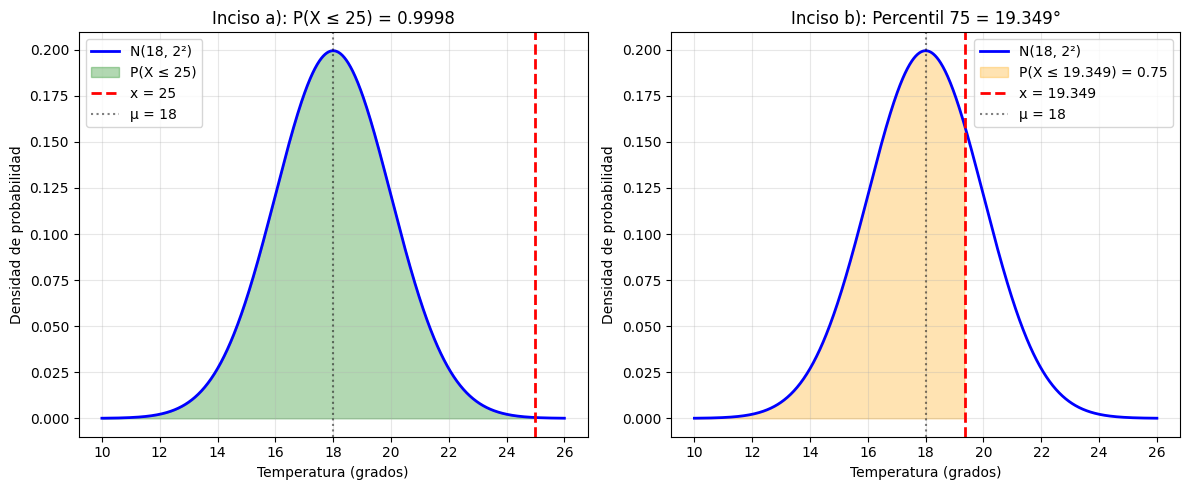

In [212]:
# Gráfico de la distribución
x_range = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y_range = norm.pdf(x_range, mu, sigma)

plt.figure(figsize=(12, 5))

# Inciso a)
plt.subplot(1, 2, 1)
plt.plot(x_range, y_range, 'b-', linewidth=2, label=f'N({mu}, {sigma}²)')
plt.fill_between(x_range[x_range <= x_a], 
                 norm.pdf(x_range[x_range <= x_a], mu, sigma),
                 alpha=0.3, color='green', label=f'P(X ≤ {x_a})')
plt.axvline(x_a, color='red', linestyle='--', linewidth=2, label=f'x = {x_a}')
plt.axvline(mu, color='black', linestyle=':', alpha=0.5, label=f'μ = {mu}')
plt.xlabel('Temperatura (grados)')
plt.ylabel('Densidad de probabilidad')
plt.title(f'Inciso a): P(X ≤ {x_a}) = {prob_a:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)

# Inciso b)
plt.subplot(1, 2, 2)
plt.plot(x_range, y_range, 'b-', linewidth=2, label=f'N({mu}, {sigma}²)')
plt.fill_between(x_range[x_range <= x_b], 
                 norm.pdf(x_range[x_range <= x_b], mu, sigma),
                 alpha=0.3, color='orange', label=f'P(X ≤ {x_b:.3f}) = 0.75')
plt.axvline(x_b, color='red', linestyle='--', linewidth=2, label=f'x = {x_b:.3f}')
plt.axvline(mu, color='black', linestyle=':', alpha=0.5, label=f'μ = {mu}')
plt.xlabel('Temperatura (grados)')
plt.ylabel('Densidad de probabilidad')
plt.title(f'Inciso b): Percentil 75 = {x_b:.3f}°')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Resumen de Resultados

In [213]:
# Resumen final
print("\n" + "="*60)
print("📊 RESUMEN - EJERCICIO 3")
print("="*60)
print(f"Distribución: Normal con μ = {mu:.2f}°, σ = {sigma:.2f}°")
print()

resultados_ej3 = pd.DataFrame({
    'Inciso': ['a)', 'b)'],
    'Pregunta': [
        'P(X ≤ 25)',
        'Temp. mínima para ≥ 75%'
    ],
    'Resultado': [
        f'{prob_a:.4f}',
        f'{x_b:.3f}°'
    ]
})

display(resultados_ej3)
print()
print("✅ RESULTADOS:")
print(f"   a) P(X ≤ 25°) = {prob_a:.4f} = {prob_a*100:.2f}%")
print(f"   b) Temperatura mínima = {x_b:.3f} grados")
print("="*60)


📊 RESUMEN - EJERCICIO 3
Distribución: Normal con μ = 18.00°, σ = 2.00°



,Inciso,Pregunta,Resultado
0,a),P(X ≤ 25),0.9998
1,b),Temp. mínima para ≥ 75%,19.349°



✅ RESULTADOS:
   a) P(X ≤ 25°) = 0.9998 = 99.98%
   b) Temperatura mínima = 19.349 grados


# Ejercicio 4 - Verdadero o Falso sobre Covarianza, Varianza y Correlación

**Enunciado:**

Indicar si las siguientes afirmaciones son verdaderas o falsas **justificando** su respuesta. Especificar Verdadero o Falso.

**A)** "La covarianza entre X e Y puede ser calculada como $Cov(X,Y) = E(XY) - E(X)E(Y)$"

**B)** "La varianza y el desvío son ambas medidas de variabilidad, por tanto, son exactamente iguales"

**C)** "Si el coeficiente de correlación entre las variables aleatorias X e Y es 0 entonces las variables se encuentran correlacionadas"

**D)** "Si X e Y son independientes entonces la $V(aX + bY) = a^2V(X) + b^2V(Y)$"

### Inciso A) Covarianza: $Cov(X,Y) = E(XY) - E(X)E(Y)$

**Respuesta: VERDADERO ✅**

**Justificación:**

Por definición, la covarianza entre dos variables aleatorias X e Y es:
$$Cov(X,Y) = E[(X - E(X))(Y - E(Y))]$$

**Demostración:**

Expandiendo el producto:
$$Cov(X,Y) = E[(X - E(X))(Y - E(Y))]$$
$$= E[XY - XE(Y) - YE(X) + E(X)E(Y)]$$

Aplicando la linealidad de la esperanza:
$$= E(XY) - E(X)E(Y) - E(Y)E(X) + E(X)E(Y)$$

Simplificando (los términos del medio se cancelan):
$$= E(XY) - E(X)E(Y)$$

**Conclusión:** Esta es la fórmula alternativa de la covarianza, muy útil para cálculos prácticos.

In [214]:
# Ejemplo numérico para verificar la afirmación A
print("="*60)
print("INCISO A: Demostración con ejemplo numérico")
print("="*60)

# Supongamos dos variables X e Y con distribución conjunta simple
# X puede ser 1 o 2, Y puede ser 2 o 3
# P(X=1,Y=2) = 0.3, P(X=1,Y=3) = 0.2
# P(X=2,Y=2) = 0.3, P(X=2,Y=3) = 0.2

valores_xy = [(1, 2, 0.3), (1, 3, 0.2), (2, 2, 0.3), (2, 3, 0.2)]

# Calcular E(X), E(Y), E(XY)
e_x = sum(x * p for x, y, p in valores_xy)
e_y = sum(y * p for x, y, p in valores_xy)
e_xy = sum(x * y * p for x, y, p in valores_xy)

# Método 1: Fórmula alternativa
cov_formula = e_xy - e_x * e_y

# Método 2: Definición original E[(X-E(X))(Y-E(Y))]
cov_definicion = sum((x - e_x) * (y - e_y) * p for x, y, p in valores_xy)

print(f"E(X) = {e_x:.2f}")
print(f"E(Y) = {e_y:.2f}")
print(f"E(XY) = {e_xy:.2f}")
print()
print("Método 1 - Fórmula alternativa:")
print(f"Cov(X,Y) = E(XY) - E(X)E(Y) = {e_xy:.2f} - ({e_x:.2f})({e_y:.2f}) = {cov_formula:.2f}")
print()
print("Método 2 - Definición original:")
print(f"Cov(X,Y) = E[(X-E(X))(Y-E(Y))] = {cov_definicion:.2f}")
print()
print(f"✅ Ambos métodos dan el mismo resultado: {cov_formula:.2f}")
print("="*60)

INCISO A: Demostración con ejemplo numérico
E(X) = 1.50
E(Y) = 2.40
E(XY) = 3.60

Método 1 - Fórmula alternativa:
Cov(X,Y) = E(XY) - E(X)E(Y) = 3.60 - (1.50)(2.40) = -0.00

Método 2 - Definición original:
Cov(X,Y) = E[(X-E(X))(Y-E(Y))] = 0.00

✅ Ambos métodos dan el mismo resultado: -0.00


### Inciso B) Varianza y Desvío son exactamente iguales

**Respuesta: FALSO ❌**

**Justificación:**

Aunque ambas son medidas de variabilidad, **NO son iguales**:

**Varianza:**
$$V(X) = E[(X - E(X))^2]$$
- Se expresa en unidades **al cuadrado**
- Ejemplo: Si X es temperatura en °C, V(X) está en °C²

**Desvío estándar (o desviación estándar):**
$$\sigma(X) = \sqrt{V(X)}$$
- Se expresa en las **mismas unidades** que la variable original
- Ejemplo: Si X es temperatura en °C, σ(X) está en °C

**Relación entre ambas:**
$$\sigma(X) = \sqrt{V(X)}$$
$$V(X) = \sigma^2(X)$$

**Conclusión:** El desvío estándar es la **raíz cuadrada** de la varianza. Son diferentes pero están relacionadas.

In [215]:
# Ejemplo numérico para verificar la afirmación B
print("\n" + "="*60)
print("INCISO B: Diferencia entre Varianza y Desvío")
print("="*60)

# Variable aleatoria X con valores: 2, 4, 6, 8 (con igual probabilidad)
valores_x = np.array([2, 4, 6, 8])
probabilidades = np.array([0.25, 0.25, 0.25, 0.25])

# Calcular esperanza
e_x = np.sum(valores_x * probabilidades)

# Calcular varianza
varianza = np.sum((valores_x - e_x)**2 * probabilidades)

# Calcular desvío estándar
desvio = np.sqrt(varianza)

print(f"Variable X con valores: {valores_x}")
print(f"E(X) = {e_x:.2f}")
print()
print(f"Varianza: V(X) = {varianza:.2f} (unidades²)")
print(f"Desvío estándar: σ(X) = {desvio:.2f} (unidades)")
print()
print("Relación: σ(X) = √V(X)")
print(f"         {desvio:.2f} = √{varianza:.2f}")
print()
print("❌ FALSO: NO son iguales. El desvío es la raíz de la varianza")
print("="*60)


INCISO B: Diferencia entre Varianza y Desvío
Variable X con valores: [2 4 6 8]
E(X) = 5.00

Varianza: V(X) = 5.00 (unidades²)
Desvío estándar: σ(X) = 2.24 (unidades)

Relación: σ(X) = √V(X)
         2.24 = √5.00

❌ FALSO: NO son iguales. El desvío es la raíz de la varianza


### Inciso C) Si ρ(X,Y) = 0 entonces las variables están correlacionadas

**Respuesta: FALSO ❌**

**Justificación:**

El coeficiente de correlación ρ(X,Y) mide la **relación lineal** entre X e Y:
$$\rho(X,Y) = \frac{Cov(X,Y)}{\sigma(X) \sigma(Y)}$$

**Interpretación de ρ:**
- ρ = 0 → **NO hay correlación lineal** (las variables NO están linealmente relacionadas)
- ρ ≠ 0 → **SÍ hay correlación** (positiva si ρ > 0, negativa si ρ < 0)

**La afirmación dice:** "Si ρ = 0 entonces las variables **están** correlacionadas"

**Esto es FALSO porque:**
- ρ = 0 significa que las variables **NO están correlacionadas linealmente**
- Cov(X,Y) = 0 cuando ρ = 0

**Nota importante:**
- ρ = 0 **NO implica independencia** (puede haber relación no lineal)
- Pero sí implica **ausencia de correlación lineal**

**Conclusión:** Si ρ = 0, las variables **NO están correlacionadas** (linealmente).

In [216]:
# Ejemplo numérico para verificar la afirmación C
print("\n" + "="*60)
print("INCISO C: Coeficiente de correlación = 0")
print("="*60)

# Ejemplo de variables con correlación cero (simétricas)
# X: -2, -1, 0, 1, 2
# Y: 4, 1, 0, 1, 4 (Y = X²)
# Hay relación (cuadrática) pero correlación lineal = 0

x_vals = np.array([-2, -1, 0, 1, 2])
y_vals = x_vals**2
probs = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

e_x = np.sum(x_vals * probs)
e_y = np.sum(y_vals * probs)
e_xy = np.sum(x_vals * y_vals * probs)

cov_xy = e_xy - e_x * e_y
var_x = np.sum((x_vals - e_x)**2 * probs)
var_y = np.sum((y_vals - e_y)**2 * probs)

rho = cov_xy / (np.sqrt(var_x) * np.sqrt(var_y)) if var_x > 0 and var_y > 0 else 0

print(f"X: {x_vals}")
print(f"Y: {y_vals} (Y = X²)")
print()
print(f"E(X) = {e_x:.2f}")
print(f"E(Y) = {e_y:.2f}")
print(f"Cov(X,Y) = {cov_xy:.2f}")
print(f"ρ(X,Y) = {rho:.4f}")
print()
if abs(rho) < 0.01:
    print("✅ ρ ≈ 0: Las variables NO están correlacionadas linealmente")
    print("   Pero SÍ tienen relación (cuadrática)")
else:
    print("ρ ≠ 0: Las variables SÍ están correlacionadas")
print()
print("❌ FALSO: Si ρ = 0, NO están correlacionadas (linealmente)")
print("="*60)


INCISO C: Coeficiente de correlación = 0
X: [-2 -1  0  1  2]
Y: [4 1 0 1 4] (Y = X²)

E(X) = -0.00
E(Y) = 2.00
Cov(X,Y) = 0.00
ρ(X,Y) = 0.0000

✅ ρ ≈ 0: Las variables NO están correlacionadas linealmente
   Pero SÍ tienen relación (cuadrática)

❌ FALSO: Si ρ = 0, NO están correlacionadas (linealmente)


### Inciso D) Si X e Y son independientes entonces $V(aX + bY) = a^2V(X) + b^2V(Y)$

**Respuesta: VERDADERO ✅**

**Justificación:**

**Propiedad general de la varianza:**
$$V(aX + bY) = a^2V(X) + b^2V(Y) + 2ab \cdot Cov(X,Y)$$

**Si X e Y son independientes:**
- Por definición de independencia: $Cov(X,Y) = 0$
- Entonces: $2ab \cdot Cov(X,Y) = 2ab \cdot 0 = 0$

**Por lo tanto:**
$$V(aX + bY) = a^2V(X) + b^2V(Y) + 0$$
$$V(aX + bY) = a^2V(X) + b^2V(Y)$$

**Demostración de la propiedad general:**

Partiendo de la definición:
$$V(aX + bY) = E[(aX + bY)^2] - [E(aX + bY)]^2$$

Expandiendo:
$$= E[a^2X^2 + 2abXY + b^2Y^2] - [aE(X) + bE(Y)]^2$$
$$= a^2E(X^2) + 2abE(XY) + b^2E(Y^2) - a^2[E(X)]^2 - 2abE(X)E(Y) - b^2[E(Y)]^2$$

Agrupando:
$$= a^2[E(X^2) - E(X)^2] + b^2[E(Y^2) - E(Y)^2] + 2ab[E(XY) - E(X)E(Y)]$$
$$= a^2V(X) + b^2V(Y) + 2ab \cdot Cov(X,Y)$$

**Conclusión:** La fórmula es válida cuando X e Y son independientes (Cov = 0).

In [217]:
# Ejemplo numérico para verificar la afirmación D
print("\n" + "="*60)
print("INCISO D: Varianza de combinación lineal (independencia)")
print("="*60)

# Dos variables independientes X e Y
# X: valores {1, 2, 3} con P = 1/3 cada uno
# Y: valores {4, 5} con P = 1/2 cada uno

x_vals_d = np.array([1, 2, 3])
px = np.array([1/3, 1/3, 1/3])
y_vals_d = np.array([4, 5])
py = np.array([1/2, 1/2])

# Calcular E(X), V(X)
e_x_d = np.sum(x_vals_d * px)
v_x_d = np.sum((x_vals_d - e_x_d)**2 * px)

# Calcular E(Y), V(Y)
e_y_d = np.sum(y_vals_d * py)
v_y_d = np.sum((y_vals_d - e_y_d)**2 * py)

# Constantes
a = 2
b = 3

# Método 1: Fórmula directa (independencia)
v_formula = a**2 * v_x_d + b**2 * v_y_d

# Método 2: Cálculo directo de V(aX + bY)
# Para variables independientes, P(X,Y) = P(X)P(Y)
combinaciones = []
for i, x in enumerate(x_vals_d):
    for j, y in enumerate(y_vals_d):
        z = a*x + b*y
        p = px[i] * py[j]  # Independencia
        combinaciones.append((z, p))

e_z = sum(z * p for z, p in combinaciones)
v_z_directo = sum((z - e_z)**2 * p for z, p in combinaciones)

print("Variables independientes:")
print(f"X ~ {dict(zip(x_vals_d, px))}")
print(f"Y ~ {dict(zip(y_vals_d, py))}")
print()
print(f"E(X) = {e_x_d:.2f}, V(X) = {v_x_d:.2f}")
print(f"E(Y) = {e_y_d:.2f}, V(Y) = {v_y_d:.2f}")
print()
print(f"Sea Z = {a}X + {b}Y")
print()
print("Método 1 - Fórmula (independencia):")
print(f"V({a}X + {b}Y) = {a}²V(X) + {b}²V(Y)")
print(f"              = {a**2}({v_x_d:.2f}) + {b**2}({v_y_d:.2f})")
print(f"              = {v_formula:.2f}")
print()
print("Método 2 - Cálculo directo:")
print(f"V(Z) = {v_z_directo:.2f}")
print()
print(f"✅ Ambos métodos coinciden: {v_formula:.2f}")
print("="*60)


INCISO D: Varianza de combinación lineal (independencia)
Variables independientes:
X ~ {np.int64(1): np.float64(0.3333333333333333), np.int64(2): np.float64(0.3333333333333333), np.int64(3): np.float64(0.3333333333333333)}
Y ~ {np.int64(4): np.float64(0.5), np.int64(5): np.float64(0.5)}

E(X) = 2.00, V(X) = 0.67
E(Y) = 4.50, V(Y) = 0.25

Sea Z = 2X + 3Y

Método 1 - Fórmula (independencia):
V(2X + 3Y) = 2²V(X) + 3²V(Y)
              = 4(0.67) + 9(0.25)
              = 4.92

Método 2 - Cálculo directo:
V(Z) = 4.92

✅ Ambos métodos coinciden: 4.92


### Resumen de Resultados

In [218]:
# Resumen final
print("\n" + "="*60)
print("📊 RESUMEN - EJERCICIO 4")
print("="*60)

resultados_ej4 = pd.DataFrame({
    'Inciso': ['A)', 'B)', 'C)', 'D)'],
    'Afirmación': [
        'Cov(X,Y) = E(XY) - E(X)E(Y)',
        'Varianza = Desvío estándar',
        'ρ = 0 → variables correlacionadas',
        'Indep. → V(aX+bY) = a²V(X)+b²V(Y)'
    ],
    'Respuesta': [
        'VERDADERO ✅',
        'FALSO ❌',
        'FALSO ❌',
        'VERDADERO ✅'
    ],
    'Justificación': [
        'Fórmula alternativa demostrable',
        'σ = √V (raíz de varianza)',
        'ρ=0 → NO correlacionadas',
        'Cov=0 cuando son independientes'
    ]
})

display(resultados_ej4)
print("="*60)


📊 RESUMEN - EJERCICIO 4

📊 RESUMEN - EJERCICIO 4


,Inciso,Afirmación,Respuesta,Justificación
0,A),"Cov(X,Y) = E(XY) - E(X)E(Y)",VERDADERO ✅,Fórmula alternativa demostrable
1,B),Varianza = Desvío estándar,FALSO ❌,σ = √V (raíz de varianza)
2,C),ρ = 0 → variables correlacionadas,FALSO ❌,ρ=0 → NO correlacionadas
3,D),Indep. → V(aX+bY) = a²V(X)+b²V(Y),VERDADERO ✅,Cov=0 cuando son independientes


# Ejercicio 5 - Distribución de Poisson (Imperfecciones en alambre)

**Enunciado:**

Supongamos que el número de imperfecciones en un alambre delgado de cobre tiene una media de 2.3 imperfecciones por milímetro.

- A) Determine la probabilidad de 2 imperfecciones en un milímetro de alambre.
- B) Determine la probabilidad de 10 imperfecciones en 5 milímetros de alambre.

**Respuestas:** A) 26,52% (0,2652) B) 11,29% (0,1129)

**Definir la variable aleatoria y parámetros:**

- **Variable aleatoria:** X = número de imperfecciones en el alambre
- **Distribución:** Poisson (contamos eventos en un intervalo continuo)
- **Parámetro:** λ = 2.3 imperfecciones/mm

**Modelo de Poisson:**
$$P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}$$

In [219]:
# Parámetro de la distribución
lambda_mm = 2.3  # imperfecciones por milímetro

print("📊 Parámetros de la distribución:")
print(f"Tasa promedio: λ = {lambda_mm} imperfecciones/mm")
print(f"Distribución: X ~ Poisson({lambda_mm})")

📊 Parámetros de la distribución:
Tasa promedio: λ = 2.3 imperfecciones/mm
Distribución: X ~ Poisson(2.3)


### Inciso a) Probabilidad de 2 imperfecciones en 1 milímetro

**Pregunta:** P(X = 2) con λ = 2.3

**Fórmula:**
$$P(X = 2) = \frac{e^{-2.3} \cdot 2.3^2}{2!}$$

In [220]:
# Inciso a)
from scipy.stats import poisson

k_a = 2  # número de imperfecciones
longitud_a = 1  # milímetro

# Lambda para 1 mm
lambda_a = lambda_mm * longitud_a

# Calcular P(X = 2)
prob_a = poisson.pmf(k_a, lambda_a)

print("="*60)
print("INCISO A: P(X = 2) en 1 mm")
print("="*60)
display(Math(r'P(X = 2) = \frac{e^{-\lambda} \cdot \lambda^2}{2!}'))
display(Math(r'P(X = 2) = \frac{e^{-' + f'{lambda_a}' + r'} \cdot ' + f'{lambda_a}' + r'^2}{2}'))
print()
print(f"✅ P(X = 2) = {prob_a:.4f}")
print(f"   P(X = 2) = {prob_a*100:.2f}%")
print("="*60)

INCISO A: P(X = 2) en 1 mm


<IPython.core.display.Math object>

<IPython.core.display.Math object>


✅ P(X = 2) = 0.2652
   P(X = 2) = 26.52%


### Inciso b) Probabilidad de 10 imperfecciones en 5 milímetros

**Pregunta:** P(X = 10) en 5 mm

**Ajuste del parámetro:**
- En 1 mm: λ = 2.3 imperfecciones
- En 5 mm: λ₅ = 2.3 × 5 = 11.5 imperfecciones

**Fórmula:**
$$P(X = 10) = \frac{e^{-11.5} \cdot 11.5^{10}}{10!}$$

In [221]:
# Inciso b)
k_b = 10  # número de imperfecciones
longitud_b = 5  # milímetros

# Lambda para 5 mm
lambda_b = lambda_mm * longitud_b

# Calcular P(X = 10) en 5 mm
prob_b = poisson.pmf(k_b, lambda_b)

print("\n" + "="*60)
print("INCISO B: P(X = 10) en 5 mm")
print("="*60)
print(f"Ajuste de λ para {longitud_b} mm:")
print(f"λ₅ = λ × longitud = {lambda_mm} × {longitud_b} = {lambda_b:.2f}")
print()
display(Math(r'P(X = 10) = \frac{e^{-\lambda_5} \cdot \lambda_5^{10}}{10!}'))
display(Math(r'P(X = 10) = \frac{e^{-' + f'{lambda_b}' + r'} \cdot ' + f'{lambda_b}' + r'^{10}}{10!}'))
print()
print(f"✅ P(X = 10) = {prob_b:.4f}")
print(f"   P(X = 10) = {prob_b*100:.2f}%")
print("="*60)


INCISO B: P(X = 10) en 5 mm
Ajuste de λ para 5 mm:
λ₅ = λ × longitud = 2.3 × 5 = 11.50



<IPython.core.display.Math object>

<IPython.core.display.Math object>


✅ P(X = 10) = 0.1129
   P(X = 10) = 11.29%


### Resumen de Resultados

In [222]:
# Resumen final
print("\n" + "="*60)
print("📊 RESUMEN - EJERCICIO 5")
print("="*60)
print(f"Distribución: Poisson con λ = {lambda_mm} imperfecciones/mm")
print()

resultados_ej5 = pd.DataFrame({
    'Inciso': ['a)', 'b)'],
    'Pregunta': [
        'P(X = 2) en 1 mm',
        'P(X = 10) en 5 mm'
    ],
    'Lambda': [
        f'{lambda_a:.2f}',
        f'{lambda_b:.2f}'
    ],
    'Resultado': [
        f'{prob_a:.4f}',
        f'{prob_b:.4f}'
    ]
})

display(resultados_ej5)
print()
print("✅ RESULTADOS:")
print(f"   a) P(X = 2) en 1 mm = {prob_a:.4f} = {prob_a*100:.2f}%")
print(f"   b) P(X = 10) en 5 mm = {prob_b:.4f} = {prob_b*100:.2f}%")
print("="*60)


📊 RESUMEN - EJERCICIO 5
Distribución: Poisson con λ = 2.3 imperfecciones/mm



,Inciso,Pregunta,Lambda,Resultado
0,a),P(X = 2) en 1 mm,2.30,0.2652
1,b),P(X = 10) en 5 mm,11.50,0.1129



✅ RESULTADOS:
   a) P(X = 2) en 1 mm = 0.2652 = 26.52%
   b) P(X = 10) en 5 mm = 0.1129 = 11.29%


# Ejercicio 6

En un determinado comercio el importe de ventas mensuales tiene una media $300 mil y desvío estándar $50 mil.

**A)** Defina la variable aleatoria. ¿Qué distribución sigue y cuáles son los valores de sus parámetros?

**B)** ¿Cuál es el importe mínimo de ventas mensuales que debe realizar si se espera que las ventas se ubiquen por encima del 75,80%?

### Inciso a)

**Definición de la variable aleatoria:**

- **X**: Importe de ventas mensuales en miles de pesos

**Datos conocidos:**
- Media: μ = 300 (miles)
- Desvío estándar: σ = 50 (miles)

**Distribución:**

Como se trata de una variable continua (importes de ventas) con media y desvío estándar conocidos, y no se especifica otra distribución, asumimos que sigue una distribución **Normal**:

$$X \sim N(300, 50)$$

Donde:
- μ = 300 (media en miles de pesos)
- σ = 50 (desvío estándar en miles de pesos)

In [223]:
print("📊 Datos conocidos:")
print("="*60)
mu_ventas = 300  # miles de pesos
sigma_ventas = 50  # miles de pesos

print(f"Media (μ) = {mu_ventas} miles de pesos")
print(f"Desvío estándar (σ) = {sigma_ventas} miles de pesos")
print()
print("📐 Distribución:")
print("="*60)
print("X ~ N(300, 50)")
print()
print("Parámetros:")
print(f"  • μ = {mu_ventas} (miles de pesos)")
print(f"  • σ = {sigma_ventas} (miles de pesos)")

📊 Datos conocidos:
Media (μ) = 300 miles de pesos
Desvío estándar (σ) = 50 miles de pesos

📐 Distribución:
X ~ N(300, 50)

Parámetros:
  • μ = 300 (miles de pesos)
  • σ = 50 (miles de pesos)
Parámetros:
  • μ = 300 (miles de pesos)
  • σ = 50 (miles de pesos)


### Inciso b)

**Objetivo:** Encontrar el importe mínimo x tal que las ventas se ubiquen por encima del 75.80%

**Interpretación:** "Por encima del 75.80%" significa que el valor x es tal que el 75.80% de las ventas son menores o iguales a x (percentil 75.80).

**Paso 1: Reformular el problema**

Buscamos x tal que:
- P(X ≤ x) = 0.7580 (percentil 75.80)
- P(X > x) = 1 - 0.7580 = 0.2420

**Paso 2: Encontrar el percentil 75.80**

Buscamos el valor x tal que P(X ≤ x) = 0.7580

**Paso 3: Estandarización**

$$z = \frac{x - \mu}{\sigma}$$

Necesitamos encontrar z tal que P(Z ≤ z) = 0.2420

**Paso 4: Calcular x**

Una vez encontrado z, despejamos:

$$x = \mu + z \cdot \sigma$$

In [224]:
# Percentil buscado
p_percentil = 0.7580  # El 75.80% de las ventas están por debajo de x

print("📐 Cálculo del importe mínimo:")
print("="*60)
print(f"Buscamos el percentil {p_percentil*100:.2f}%")
print(f"P(X ≤ x) = {p_percentil}")
print()

# Encontrar el valor z del percentil 75.80
z_valor = stats.norm.ppf(p_percentil)
print(f"Valor estandarizado: z = {z_valor:.4f}")
print()

# Calcular x
x_minimo = mu_ventas + z_valor * sigma_ventas

print("Aplicando la fórmula de estandarización:")
print("x = μ + z·σ")
print(f"x = {mu_ventas} + ({z_valor:.4f})·{sigma_ventas}")
print(f"x = {x_minimo:.2f} miles de pesos")
print()

# Verificación
prob_verificacion_b = stats.norm.cdf(x_minimo, mu_ventas, sigma_ventas)
print("✅ Verificación:")
print(f"P(X ≤ {x_minimo:.2f}) = {prob_verificacion_b:.4f}")
print(f"Esperado: {p_percentil}")

📐 Cálculo del importe mínimo:
Buscamos el percentil 75.80%
P(X ≤ x) = 0.758

Valor estandarizado: z = 0.6999

Aplicando la fórmula de estandarización:
x = μ + z·σ
x = 300 + (0.6999)·50
x = 334.99 miles de pesos

✅ Verificación:
P(X ≤ 334.99) = 0.7580
Esperado: 0.758


### Resumen de resultados

In [225]:
import pandas as pd

resultados_ej6 = pd.DataFrame({
    'Inciso': ['a) Distribución', 'a) Parámetro μ', 'a) Parámetro σ', 
               'b) Importe mínimo'],
    'Resultado': [
        'X ~ N(300, 50)',
        f'{mu_ventas} miles',
        f'{sigma_ventas} miles',
        f'{x_minimo:.0f} miles (${x_minimo:.0f},000)'
    ]
})

print("📊 EJERCICIO 6 - RESUMEN DE RESULTADOS")
print("="*60)
display(resultados_ej6)
print()
print("Interpretación del inciso b):")
print(f"El comercio debe realizar ventas de al menos ${x_minimo:.0f},000")
print(f"para ubicarse en el percentil {p_percentil*100:.2f}% (es decir, superar")
print(f"al {p_percentil*100:.2f}% de los casos).")

📊 EJERCICIO 6 - RESUMEN DE RESULTADOS


,Inciso,Resultado
0,a) Distribución,"X ~ N(300, 50)"
1,a) Parámetro μ,300 miles
2,a) Parámetro σ,50 miles
3,b) Importe mínimo,"335 miles ($335,000)"



Interpretación del inciso b):
El comercio debe realizar ventas de al menos $335,000
para ubicarse en el percentil 75.80% (es decir, superar
al 75.80% de los casos).


# Ejercicio 7 - Verdadero o Falso (Distribuciones y Conceptos)

**Enunciado:**

Indicar si las siguientes afirmaciones son verdaderas o falsas **justificando** su respuesta. Sin especificar Verdadero o Falso y sin justificación o mal justificado la respuesta se considerará incorrecta.

**A)** "Si una variable aleatoria continua tiene una distribución exponencial con parámetro 0,5, entonces la propiedad de falta de memoria implica que P(X>3/X>1) es igual a calcular P(X>2)"

**B)** "La esperanza de una variable aleatoria discreta es un promedio ponderado de los valores de la variable aleatoria"

**C)** "Si el coeficiente de correlación entre las variables aleatorias X e Y es 0 entonces las variables tienen relación lineal"

**D)** "La varianza de una variable aleatoria es igual al valor esperado de la variable al cuadrado menos el valor esperado de la variable al cuadrado"

### Inciso A) Propiedad de falta de memoria en distribución exponencial

**Afirmación:** "Si una variable aleatoria continua tiene una distribución exponencial con parámetro 0,5, entonces la propiedad de falta de memoria implica que P(X>3|X>1) es igual a calcular P(X>2)"

**Respuesta: VERDADERO ✅**

**Justificación:**

La distribución exponencial tiene la **propiedad de falta de memoria** (memoryless property):

$$P(X > s + t | X > s) = P(X > t)$$

para todo s, t ≥ 0.

**En nuestro caso:**
- X ~ Exponencial(λ = 0.5)
- Queremos verificar: P(X > 3 | X > 1) = P(X > 2)

**Aplicando la propiedad:**
- s = 1
- s + t = 3  →  t = 2

Entonces:
$$P(X > 3 | X > 1) = P(X > 1 + 2 | X > 1) = P(X > 2)$$

**Demostración matemática:**

Por definición de probabilidad condicional:
$$P(X > 3 | X > 1) = \frac{P(X > 3 \cap X > 1)}{P(X > 1)} = \frac{P(X > 3)}{P(X > 1)}$$

Para la distribución exponencial:
$$P(X > x) = e^{-\lambda x}$$

Por lo tanto:
$$P(X > 3 | X > 1) = \frac{e^{-0.5 \cdot 3}}{e^{-0.5 \cdot 1}} = \frac{e^{-1.5}}{e^{-0.5}} = e^{-1.5 + 0.5} = e^{-1} = e^{-0.5 \cdot 2}$$

Y esto es exactamente:
$$P(X > 2) = e^{-0.5 \cdot 2} = e^{-1}$$

**Conclusión:** La afirmación es VERDADERA. La propiedad de falta de memoria garantiza que P(X > 3 | X > 1) = P(X > 2).

---

**📝 Nota: ¿Qué es la propiedad de falta de memoria?**

La **propiedad de falta de memoria** significa que **"el pasado no importa para predecir el futuro"**. Formalmente:

$$P(X > s + t | X > s) = P(X > t) \quad \text{para todo } s, t \geq 0$$

**Interpretación:** Si ya sabemos que X > s (ya transcurrió un tiempo s), la probabilidad de que dure **t unidades más** es la misma que si empezáramos desde cero. El sistema "olvida" que ya pasó el tiempo s.

**Ejemplo práctico:** Tiempo de vida de un componente electrónico
- Si el componente ya funcionó 1 hora, la probabilidad de que funcione 2 horas **más** es la misma que si el componente fuera nuevo
- El componente "no envejece": no importa cuánto ha funcionado, la probabilidad de durar t horas adicionales es siempre la misma

**Distribuciones con esta propiedad:**
- ✅ **Exponencial** (continua) - única distribución continua con esta propiedad
- ✅ **Geométrica** (discreta) - única distribución discreta con esta propiedad

**Aplicaciones:** Se usa para modelar tiempos de vida sin desgaste, tiempos entre eventos aleatorios (llamadas, llegadas, fallas), decaimiento radioactivo, etc.

**Nota importante:** El código siguiente hace una **verificación numérica** para este caso particular (λ=0.5, s=1, t=2), no una demostración general de la propiedad.

In [226]:
# Verificación numérica del Inciso A
from scipy.stats import expon

print("="*60)
print("INCISO A: Propiedad de falta de memoria")
print("="*60)

# Parámetro de la distribución exponencial
lambda_exp = 0.5

# Método 1: Calcular P(X > 3 | X > 1)
# P(X > 3 | X > 1) = P(X > 3) / P(X > 1)
p_mayor_3 = 1 - expon.cdf(3, scale=1/lambda_exp)
p_mayor_1 = 1 - expon.cdf(1, scale=1/lambda_exp)
p_condicional = p_mayor_3 / p_mayor_1

print(f"X ~ Exponencial(λ = {lambda_exp})")
print()
print("Método 1 - Probabilidad condicional:")
print(f"P(X > 3) = {p_mayor_3:.6f}")
print(f"P(X > 1) = {p_mayor_1:.6f}")
print(f"P(X > 3 | X > 1) = P(X > 3) / P(X > 1)")
print(f"P(X > 3 | X > 1) = {p_mayor_3:.6f} / {p_mayor_1:.6f}")
print(f"P(X > 3 | X > 1) = {p_condicional:.6f}")
print()

# Método 2: Calcular P(X > 2) directamente
p_mayor_2 = 1 - expon.cdf(2, scale=1/lambda_exp)

print("Método 2 - Probabilidad directa:")
print(f"P(X > 2) = {p_mayor_2:.6f}")
print()

# Comparación
print("Comparación:")
print(f"P(X > 3 | X > 1) = {p_condicional:.6f}")
print(f"P(X > 2)         = {p_mayor_2:.6f}")
print("="*60)

INCISO A: Propiedad de falta de memoria
X ~ Exponencial(λ = 0.5)

Método 1 - Probabilidad condicional:
P(X > 3) = 0.223130
P(X > 1) = 0.606531
P(X > 3 | X > 1) = P(X > 3) / P(X > 1)
P(X > 3 | X > 1) = 0.223130 / 0.606531
P(X > 3 | X > 1) = 0.367879

Método 2 - Probabilidad directa:
P(X > 2) = 0.367879

Comparación:
P(X > 3 | X > 1) = 0.367879
P(X > 2)         = 0.367879


### Inciso B) Esperanza como promedio ponderado

**Afirmación:** "La esperanza de una variable aleatoria discreta es un promedio ponderado de los valores de la variable aleatoria"

**Respuesta: VERDADERO ✅**

**Justificación:**

Por definición, la **esperanza** (o valor esperado) de una variable aleatoria discreta X es:

$$E(X) = \sum_{i} x_i \cdot P(X = x_i)$$

Donde:
- $x_i$ son los valores que puede tomar la variable
- $P(X = x_i)$ son las probabilidades asociadas a cada valor

**Interpretación:**
- Cada valor $x_i$ está **ponderado** por su probabilidad $P(X = x_i)$
- Las probabilidades actúan como **pesos** que suman 1: $\sum_i P(X = x_i) = 1$
- Es un **promedio ponderado** donde los pesos son las probabilidades

**Diferencia con promedio aritmético:**
- Promedio aritmético simple: $\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$ (todos los pesos son iguales a 1/n)
- Promedio ponderado (esperanza): $E(X) = \sum_{i} x_i \cdot p_i$ (los pesos $p_i$ pueden ser diferentes)

**Conclusión:** La afirmación es VERDADERA. La esperanza es exactamente un promedio ponderado donde los pesos son las probabilidades de cada valor.

In [227]:
# Ejemplo numérico del Inciso B
print("\n" + "="*60)
print("INCISO B: Esperanza como promedio ponderado")
print("="*60)

# Ejemplo: Lanzamiento de un dado cargado
# Valores: 1, 2, 3, 4, 5, 6
# Probabilidades desiguales (dado cargado)
valores_dado = np.array([1, 2, 3, 4, 5, 6])
prob_dado = np.array([0.10, 0.15, 0.20, 0.25, 0.20, 0.10])

# Verificar que suman 1
suma_prob = np.sum(prob_dado)

print("Ejemplo: Dado cargado")
print(f"Valores: {valores_dado}")
print(f"Probabilidades: {prob_dado}")
print(f"Suma de probabilidades: {suma_prob:.2f}")
print()

# Calcular esperanza (promedio ponderado)
esperanza = np.sum(valores_dado * prob_dado)

print("Cálculo de la esperanza:")
print("E(X) = Σ x_i · P(X = x_i)")
for i, (val, prob) in enumerate(zip(valores_dado, prob_dado)):
    print(f"     + {val} · {prob:.2f} = {val * prob:.2f}")
print(f"E(X) = {esperanza:.2f}")
print()

# Comparar con promedio aritmético simple
promedio_simple = np.mean(valores_dado)

print("Comparación:")
print(f"Promedio ponderado (esperanza): E(X) = {esperanza:.2f}")
print(f"Promedio aritmético simple:     μ    = {promedio_simple:.2f}")
print("="*60)


INCISO B: Esperanza como promedio ponderado
Ejemplo: Dado cargado
Valores: [1 2 3 4 5 6]
Probabilidades: [0.1  0.15 0.2  0.25 0.2  0.1 ]
Suma de probabilidades: 1.00

Cálculo de la esperanza:
E(X) = Σ x_i · P(X = x_i)
     + 1 · 0.10 = 0.10
     + 2 · 0.15 = 0.30
     + 3 · 0.20 = 0.60
     + 4 · 0.25 = 1.00
     + 5 · 0.20 = 1.00
     + 6 · 0.10 = 0.60
E(X) = 3.60

Comparación:
Promedio ponderado (esperanza): E(X) = 3.60
Promedio aritmético simple:     μ    = 3.50

Comparación:
Promedio ponderado (esperanza): E(X) = 3.60
Promedio aritmético simple:     μ    = 3.50


### Inciso C) Correlación cero y relación lineal

**Afirmación:** "Si el coeficiente de correlación entre las variables aleatorias X e Y es 0 entonces las variables tienen relación lineal"

**Respuesta: FALSO ❌**

**Justificación:**

El coeficiente de correlación ρ(X,Y) mide la **intensidad de la relación lineal** entre X e Y:

$$\rho(X,Y) = \frac{Cov(X,Y)}{\sigma(X) \cdot \sigma(Y)}$$

**Interpretación correcta:**
- ρ = 0 → **NO hay relación lineal** (las variables NO están correlacionadas linealmente)
- ρ ≠ 0 → **SÍ hay relación lineal** (positiva si ρ > 0, negativa si ρ < 0)
- |ρ| = 1 → Relación lineal perfecta

**La afirmación dice lo opuesto:**
- Dice: "ρ = 0 → tienen relación lineal" ❌
- Correcto: "ρ = 0 → NO tienen relación lineal" ✅

**Observaciones importantes:**
1. ρ = 0 **NO implica independencia** (puede haber relación no lineal, por ejemplo cuadrática)
2. ρ = 0 **SÍ implica ausencia de correlación lineal**
3. Pueden existir relaciones (no lineales) con ρ = 0

**Conclusión:** La afirmación es FALSA. Si ρ = 0, las variables **NO tienen relación lineal** (aunque podrían tener otro tipo de relación).

In [228]:
# Ejemplo numérico del Inciso C
print("\n" + "="*60)
print("INCISO C: Correlación = 0 y relación lineal")
print("="*60)

# Ejemplo: Relación cuadrática (Y = X²) con ρ = 0
# X simétrica alrededor de 0
x_vals_c = np.array([-2, -1, 0, 1, 2])
y_vals_c = x_vals_c**2  # Relación cuadrática
probs_c = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

print("Ejemplo: Y = X² (relación cuadrática, NO lineal)")
print(f"X: {x_vals_c}")
print(f"Y: {y_vals_c}")
print()

# Calcular esperanzas y covarianza
e_x_c = np.sum(x_vals_c * probs_c)
e_y_c = np.sum(y_vals_c * probs_c)
e_xy_c = np.sum(x_vals_c * y_vals_c * probs_c)

cov_xy_c = e_xy_c - e_x_c * e_y_c

# Calcular varianzas
var_x_c = np.sum((x_vals_c - e_x_c)**2 * probs_c)
var_y_c = np.sum((y_vals_c - e_y_c)**2 * probs_c)

# Calcular correlación
if var_x_c > 0 and var_y_c > 0:
    rho_c = cov_xy_c / (np.sqrt(var_x_c) * np.sqrt(var_y_c))
else:
    rho_c = 0

print(f"E(X) = {e_x_c:.2f}")
print(f"E(Y) = {e_y_c:.2f}")
print(f"Cov(X,Y) = {cov_xy_c:.4f}")
print(f"ρ(X,Y) = {rho_c:.4f}")
print("="*60)


INCISO C: Correlación = 0 y relación lineal
Ejemplo: Y = X² (relación cuadrática, NO lineal)
X: [-2 -1  0  1  2]
Y: [4 1 0 1 4]

E(X) = -0.00
E(Y) = 2.00
Cov(X,Y) = 0.0000
ρ(X,Y) = 0.0000

INCISO C: Correlación = 0 y relación lineal
Ejemplo: Y = X² (relación cuadrática, NO lineal)
X: [-2 -1  0  1  2]
Y: [4 1 0 1 4]

E(X) = -0.00
E(Y) = 2.00
Cov(X,Y) = 0.0000
ρ(X,Y) = 0.0000


### Inciso D) Fórmula de la varianza

**Afirmación:** "La varianza de una variable aleatoria es igual al valor esperado de la variable al cuadrado menos el valor esperado de la variable al cuadrado"

**Respuesta: VERDADERO ✅**

**Justificación:**

La afirmación describe la **fórmula alternativa de la varianza**:

$$V(X) = E(X^2) - [E(X)]^2$$

Donde:
- $E(X^2)$ = "valor esperado de la variable al cuadrado" (esperanza de X²)
- $[E(X)]^2$ = "valor esperado de la variable, al cuadrado" (cuadrado de la esperanza)

**Demostración:**

Partiendo de la definición de varianza:
$$V(X) = E[(X - E(X))^2]$$

Expandiendo el cuadrado:
$$V(X) = E[X^2 - 2X \cdot E(X) + E(X)^2]$$

Aplicando la linealidad de la esperanza:
$$V(X) = E(X^2) - 2E(X) \cdot E(X) + E(X)^2$$

$$V(X) = E(X^2) - 2[E(X)]^2 + [E(X)]^2$$

$$V(X) = E(X^2) - [E(X)]^2$$

**Interpretación:**
- $E(X^2)$: Promedio de los valores al cuadrado
- $[E(X)]^2$: Cuadrado del promedio de los valores
- La varianza es la diferencia entre ambos

**Conclusión:** La afirmación es VERDADERA. Esta es la fórmula alternativa (y muy útil) para calcular la varianza.

In [229]:
# Ejemplo numérico del Inciso D
print("\n" + "="*60)
print("INCISO D: Fórmula alternativa de la varianza")
print("="*60)

# Ejemplo: Variable discreta simple
valores_d = np.array([1, 3, 5, 7, 9])
probs_d = np.array([0.1, 0.2, 0.4, 0.2, 0.1])

print("Ejemplo: Variable aleatoria discreta")
print(f"Valores: {valores_d}")
print(f"Probabilidades: {probs_d}")
print()

# Calcular E(X)
e_x_d = np.sum(valores_d * probs_d)

# Calcular E(X²)
e_x2_d = np.sum(valores_d**2 * probs_d)

print("Cálculos:")
print(f"E(X) = {e_x_d:.2f}")
print(f"E(X²) = {e_x2_d:.2f}")
print(f"[E(X)]² = {e_x_d**2:.2f}")
print()

# Método 1: Definición V(X) = E[(X - E(X))²]
v_definicion_d = np.sum((valores_d - e_x_d)**2 * probs_d)

# Método 2: Fórmula alternativa V(X) = E(X²) - [E(X)]²
v_formula_d = e_x2_d - e_x_d**2

print("Método 1 - Definición:")
print(f"V(X) = E[(X - E(X))²] = {v_definicion_d:.2f}")
print()

print("Método 2 - Fórmula alternativa:")
print(f"V(X) = E(X²) - [E(X)]²")
print(f"V(X) = {e_x2_d:.2f} - {e_x_d**2:.2f}")
print(f"V(X) = {v_formula_d:.2f}")
print()

print("Comparación:")
print(f"Método 1: {v_definicion_d:.2f}")
print(f"Método 2: {v_formula_d:.2f}")
print("="*60)


INCISO D: Fórmula alternativa de la varianza
Ejemplo: Variable aleatoria discreta
Valores: [1 3 5 7 9]
Probabilidades: [0.1 0.2 0.4 0.2 0.1]

Cálculos:
E(X) = 5.00
E(X²) = 29.80
[E(X)]² = 25.00

Método 1 - Definición:
V(X) = E[(X - E(X))²] = 4.80

Método 2 - Fórmula alternativa:
V(X) = E(X²) - [E(X)]²
V(X) = 29.80 - 25.00
V(X) = 4.80

Comparación:
Método 1: 4.80
Método 2: 4.80


### Resumen de Resultados

In [230]:
print("\n" + "="*60)
print("📊 RESUMEN - EJERCICIO 7")
print("="*60)

resultados_ej7 = pd.DataFrame({
    'Inciso': ['A)', 'B)', 'C)', 'D)'],
    'Afirmación': [
        'Exponencial: P(X>3|X>1) = P(X>2)',
        'E(X) es promedio ponderado',
        'ρ=0 → tienen relación lineal',
        'V(X) = E(X²) - [E(X)]²'
    ],
    'Respuesta': [
        'VERDADERO ✅',
        'VERDADERO ✅',
        'FALSO ❌',
        'VERDADERO ✅'
    ],
    'Justificación': [
        'Propiedad de falta de memoria',
        'Definición de esperanza',
        'ρ=0 → NO hay relación lineal',
        'Fórmula alternativa de varianza'
    ]
})

display(resultados_ej7)
print("="*60)


📊 RESUMEN - EJERCICIO 7


,Inciso,Afirmación,Respuesta,Justificación
0,A),Exponencial: P(X>3|X>1) = P(X>2),VERDADERO ✅,Propiedad de falta de memoria
1,B),E(X) es promedio ponderado,VERDADERO ✅,Definición de esperanza
2,C),ρ=0 → tienen relación lineal,FALSO ❌,ρ=0 → NO hay relación lineal
3,D),V(X) = E(X²) - [E(X)]²,VERDADERO ✅,Fórmula alternativa de varianza


# Ejercicio 8 - Teorema de Bayes (Telas Defectuosas)

**Enunciado:**

Supongamos que el 2% de los rollos de tela de algodón son defectuosos, al igual que el 3% de los rollos de tela de nylon. De los rollos utilizados por un fabricante, 70% son de algodón y 30% son de nylon.

**A)** Defina los eventos.

**B)** Si elegimos un rollo y resulta ser defectuoso, ¿Cuál es la probabilidad de que sea de tela de algodón?

**Respuestas:** A) A: "Tela de algodón", N: "Tela de nylon", D: "Tela defectuosa"  
B) 0.6087 ≈ 61%

### Inciso a) Definir los eventos

**Eventos:**

- **A**: El rollo es de tela de **algodón**
- **N**: El rollo es de tela de **nylon**
- **D**: El rollo es **defectuoso**

**Datos conocidos:**

- P(A) = 0.70 (70% de los rollos son de algodón)
- P(N) = 0.30 (30% de los rollos son de nylon)
- P(D|A) = 0.02 (2% de los rollos de algodón son defectuosos)
- P(D|N) = 0.03 (3% de los rollos de nylon son defectuosos)

**Observaciones:**
- A y N son eventos **mutuamente excluyentes** (un rollo no puede ser algodón y nylon a la vez)
- A y N forman una **partición** del espacio muestral: P(A) + P(N) = 1

In [231]:
print("📊 Datos conocidos:")
print("="*60)

# Probabilidades a priori (de los tipos de tela)
p_a = 0.70  # P(A) - algodón
p_n = 0.30  # P(N) - nylon

# Probabilidades condicionales (defectuoso dado el tipo)
p_d_dado_a = 0.02  # P(D|A) - defectuoso dado algodón
p_d_dado_n = 0.03  # P(D|N) - defectuoso dado nylon

print("Eventos:")
print("  A: Tela de algodón")
print("  N: Tela de nylon")
print("  D: Tela defectuosa")
print()
print("Probabilidades a priori:")
print(f"  P(A) = {p_a:.2f} ({p_a*100:.0f}% son de algodón)")
print(f"  P(N) = {p_n:.2f} ({p_n*100:.0f}% son de nylon)")
print()
print("Probabilidades condicionales:")
print(f"  P(D|A) = {p_d_dado_a:.2f} ({p_d_dado_a*100:.0f}% algodón defectuoso)")
print(f"  P(D|N) = {p_d_dado_n:.2f} ({p_d_dado_n*100:.0f}% nylon defectuoso)")
print("="*60)

📊 Datos conocidos:
Eventos:
  A: Tela de algodón
  N: Tela de nylon
  D: Tela defectuosa

Probabilidades a priori:
  P(A) = 0.70 (70% son de algodón)
  P(N) = 0.30 (30% son de nylon)

Probabilidades condicionales:
  P(D|A) = 0.02 (2% algodón defectuoso)
  P(D|N) = 0.03 (3% nylon defectuoso)


### Inciso b) Probabilidad de que sea algodón dado que es defectuoso

**Pregunta:** P(A|D) = ?

Sabemos que el rollo es defectuoso, y queremos saber la probabilidad de que sea de algodón.

**Solución usando el Teorema de Bayes:**

$$P(A|D) = \frac{P(D|A) \cdot P(A)}{P(D)}$$

**Paso 1: Calcular P(D) usando la Ley de Probabilidad Total**

Como A y N forman una partición:

$$P(D) = P(D|A) \cdot P(A) + P(D|N) \cdot P(N)$$

**Paso 2: Aplicar el Teorema de Bayes**

$$P(A|D) = \frac{P(D|A) \cdot P(A)}{P(D|A) \cdot P(A) + P(D|N) \cdot P(N)}$$

**Sustituyendo valores:**

$$P(A|D) = \frac{0.02 \times 0.70}{0.02 \times 0.70 + 0.03 \times 0.30}$$

$$P(A|D) = \frac{0.014}{0.014 + 0.009} = \frac{0.014}{0.023}$$

In [232]:
print("\n📐 Cálculo usando Teorema de Bayes:")
print("="*60)

# Paso 1: Calcular P(D) - Probabilidad total de defectuoso
p_d_y_a = p_d_dado_a * p_a  # P(D ∩ A)
p_d_y_n = p_d_dado_n * p_n  # P(D ∩ N)
p_d = p_d_y_a + p_d_y_n     # P(D) por ley de probabilidad total

print("Paso 1: Calcular P(D) usando Ley de Probabilidad Total")
print()
print("P(D) = P(D|A)·P(A) + P(D|N)·P(N)")
print(f"P(D) = {p_d_dado_a}·{p_a} + {p_d_dado_n}·{p_n}")
print(f"P(D) = {p_d_y_a:.4f} + {p_d_y_n:.4f}")
print(f"P(D) = {p_d:.4f}")
print()

# Paso 2: Aplicar Teorema de Bayes
p_a_dado_d = (p_d_dado_a * p_a) / p_d

print("Paso 2: Aplicar Teorema de Bayes")
print()
print("P(A|D) = P(D|A)·P(A) / P(D)")
print(f"P(A|D) = ({p_d_dado_a}·{p_a}) / {p_d:.4f}")
print(f"P(A|D) = {p_d_y_a:.4f} / {p_d:.4f}")
print(f"P(A|D) = {p_a_dado_d:.4f}")
print()
print(f"✅ P(A|D) = {p_a_dado_d:.4f} ≈ {p_a_dado_d*100:.2f}%")
print("="*60)


📐 Cálculo usando Teorema de Bayes:
Paso 1: Calcular P(D) usando Ley de Probabilidad Total

P(D) = P(D|A)·P(A) + P(D|N)·P(N)
P(D) = 0.02·0.7 + 0.03·0.3
P(D) = 0.0140 + 0.0090
P(D) = 0.0230

Paso 2: Aplicar Teorema de Bayes

P(A|D) = P(D|A)·P(A) / P(D)
P(A|D) = (0.02·0.7) / 0.0230
P(A|D) = 0.0140 / 0.0230
P(A|D) = 0.6087

✅ P(A|D) = 0.6087 ≈ 60.87%


**Interpretación del resultado:**

Si elegimos un rollo al azar y resulta ser defectuoso, hay aproximadamente un **60.87%** de probabilidad de que sea de algodón.

**¿Por qué este resultado?**

Aunque los rollos de nylon tienen una tasa de defectos mayor (3% vs 2%), hay **muchos más rollos de algodón** (70% vs 30%) en el inventario. Por lo tanto, la mayoría de los defectos provienen del algodón.

### Verificación complementaria

Calculemos también P(N|D) para verificar que suman 1:

In [233]:
print("\n📐 Verificación complementaria:")
print("="*60)

# Calcular P(N|D) - Probabilidad de nylon dado defectuoso
p_n_dado_d = (p_d_dado_n * p_n) / p_d

print("P(N|D) = P(D|N)·P(N) / P(D)")
print(f"P(N|D) = ({p_d_dado_n}·{p_n}) / {p_d:.4f}")
print(f"P(N|D) = {p_d_y_n:.4f} / {p_d:.4f}")
print(f"P(N|D) = {p_n_dado_d:.4f} ≈ {p_n_dado_d*100:.2f}%")
print()

# Verificar que suman 1
suma_probabilidades = p_a_dado_d + p_n_dado_d

print("Verificación:")
print(f"P(A|D) + P(N|D) = {p_a_dado_d:.4f} + {p_n_dado_d:.4f}")
print(f"                 = {suma_probabilidades:.4f}")
print("="*60)


📐 Verificación complementaria:
P(N|D) = P(D|N)·P(N) / P(D)
P(N|D) = (0.03·0.3) / 0.0230
P(N|D) = 0.0090 / 0.0230
P(N|D) = 0.3913 ≈ 39.13%

Verificación:
P(A|D) + P(N|D) = 0.6087 + 0.3913
                 = 1.0000


### Resumen de Resultados

In [234]:
print("\n" + "="*60)
print("📊 RESUMEN - EJERCICIO 8")
print("="*60)

resultados_ej8 = pd.DataFrame({
    'Inciso': ['a) Eventos', 'a) Eventos', 'a) Eventos', 
               'b) P(A|D)'],
    'Descripción': [
        'A: Tela de algodón',
        'N: Tela de nylon',
        'D: Tela defectuosa',
        'Prob. algodón dado defectuoso'
    ],
    'Resultado': [
        'Evento definido',
        'Evento definido',
        'Evento definido',
        f'{p_a_dado_d:.4f} ({p_a_dado_d*100:.2f}%)'
    ]
})

display(resultados_ej8)
print()
print("Conclusión:")
print(f"Si un rollo es defectuoso, hay {p_a_dado_d*100:.2f}% de probabilidad")
print("de que sea de algodón (vs {:.2f}% de que sea de nylon)".format(p_n_dado_d*100))
print("="*60)


📊 RESUMEN - EJERCICIO 8


,Inciso,Descripción,Resultado
0,a) Eventos,A: Tela de algodón,Evento definido
1,a) Eventos,N: Tela de nylon,Evento definido
2,a) Eventos,D: Tela defectuosa,Evento definido
3,b) P(A|D),Prob. algodón dado defectuoso,0.6087 (60.87%)



Conclusión:
Si un rollo es defectuoso, hay 60.87% de probabilidad
de que sea de algodón (vs 39.13% de que sea de nylon)


# Ejercicio 9

Sean X una variable aleatoria discreta que toma valores 2 y 5 e Y una variable aleatoria discreta que toma valores 1 y 4. Las probabilidades conjuntas se encuentran en la siguiente tabla.

|   | Y |   |   |
|---|---|---|---|
| **X** | **1** | **4** |
| **2** | 0,1 | 0,4 |
| **5** | 0,3 | 0,2 |

Calcular la COV(X,Y) e interpretar el resultado

### Paso 1: Definir la distribución conjunta y calcular las distribuciones marginales

In [235]:
import numpy as np
import pandas as pd

# Valores de X e Y
x_vals_ej9 = np.array([2, 5])
y_vals_ej9 = np.array([1, 4])

# Distribución conjunta P(X,Y)
# Filas: X = 2, 5
# Columnas: Y = 1, 4
p_conjunta = np.array([
    [0.1, 0.4],  # X=2: P(X=2,Y=1)=0.1, P(X=2,Y=4)=0.4
    [0.3, 0.2]   # X=5: P(X=5,Y=1)=0.3, P(X=5,Y=4)=0.2
])

print("============================================================")
print("📊 Distribución Conjunta P(X,Y)")
print("============================================================")
tabla_conjunta = pd.DataFrame(p_conjunta, 
                              index=[f'X={x}' for x in x_vals_ej9],
                              columns=[f'Y={y}' for y in y_vals_ej9])
print(tabla_conjunta)
print()

# Distribuciones marginales
px_ej9 = p_conjunta.sum(axis=1)  # Sumar por filas
py_ej9 = p_conjunta.sum(axis=0)  # Sumar por columnas

print("Distribuciones marginales:")
print(f"P(X=2) = {px_ej9[0]:.1f}")
print(f"P(X=5) = {px_ej9[1]:.1f}")
print(f"P(Y=1) = {py_ej9[0]:.1f}")
print(f"P(Y=4) = {py_ej9[1]:.1f}")
print("============================================================")
print()

📊 Distribución Conjunta P(X,Y)
     Y=1  Y=4
X=2  0.1  0.4
X=5  0.3  0.2

Distribuciones marginales:
P(X=2) = 0.5
P(X=5) = 0.5
P(Y=1) = 0.4
P(Y=4) = 0.6



### Paso 2: Calcular E(X) y E(Y)

In [236]:
print("============================================================")
print("📐 Cálculo de E(X) y E(Y)")
print("============================================================")

# E(X) = Σ x * P(X=x)
e_x_ej9 = np.sum(x_vals_ej9 * px_ej9)
print("E(X) = Σ x·P(X=x)")
print(f"E(X) = 2·{px_ej9[0]:.1f} + 5·{px_ej9[1]:.1f}")
print(f"E(X) = {2*px_ej9[0]:.1f} + {5*px_ej9[1]:.1f}")
print(f"E(X) = {e_x_ej9:.2f}")
print()

# E(Y) = Σ y * P(Y=y)
e_y_ej9 = np.sum(y_vals_ej9 * py_ej9)
print("E(Y) = Σ y·P(Y=y)")
print(f"E(Y) = 1·{py_ej9[0]:.1f} + 4·{py_ej9[1]:.1f}")
print(f"E(Y) = {1*py_ej9[0]:.1f} + {4*py_ej9[1]:.1f}")
print(f"E(Y) = {e_y_ej9:.2f}")
print("============================================================")
print()

📐 Cálculo de E(X) y E(Y)
E(X) = Σ x·P(X=x)
E(X) = 2·0.5 + 5·0.5
E(X) = 1.0 + 2.5
E(X) = 3.50

E(Y) = Σ y·P(Y=y)
E(Y) = 1·0.4 + 4·0.6
E(Y) = 0.4 + 2.4
E(Y) = 2.80



### Paso 3: Calcular E(XY)

In [237]:
print("============================================================")
print("📐 Cálculo de E(XY)")
print("============================================================")

# E(XY) = Σ Σ x·y·P(X=x,Y=y)
e_xy_ej9 = 0
print("E(XY) = Σ Σ x·y·P(X=x,Y=y)")
print()

for i, x in enumerate(x_vals_ej9):
    for j, y in enumerate(y_vals_ej9):
        producto = x * y * p_conjunta[i, j]
        e_xy_ej9 += producto
        print(f"  {x}·{y}·{p_conjunta[i,j]:.1f} = {producto:.1f}")

print()
print(f"E(XY) = {e_xy_ej9:.2f}")
print("============================================================")
print()

📐 Cálculo de E(XY)
E(XY) = Σ Σ x·y·P(X=x,Y=y)

  2·1·0.1 = 0.2
  2·4·0.4 = 3.2
  5·1·0.3 = 1.5
  5·4·0.2 = 4.0

E(XY) = 8.90



### Paso 4: Calcular COV(X,Y)

In [238]:
print("============================================================")
print("📐 Cálculo de COV(X,Y)")
print("============================================================")

# COV(X,Y) = E(XY) - E(X)·E(Y)
cov_xy_ej9 = e_xy_ej9 - (e_x_ej9 * e_y_ej9)

print("COV(X,Y) = E(XY) - E(X)·E(Y)")
print(f"COV(X,Y) = {e_xy_ej9:.2f} - ({e_x_ej9:.2f})·({e_y_ej9:.2f})")
print(f"COV(X,Y) = {e_xy_ej9:.2f} - {e_x_ej9 * e_y_ej9:.2f}")
print(f"COV(X,Y) = {cov_xy_ej9:.2f}")
print("============================================================")
print()

📐 Cálculo de COV(X,Y)
COV(X,Y) = E(XY) - E(X)·E(Y)
COV(X,Y) = 8.90 - (3.50)·(2.80)
COV(X,Y) = 8.90 - 9.80
COV(X,Y) = -0.90



### Interpretación del resultado

In [239]:
print("============================================================")
print("📊 INTERPRETACIÓN")
print("============================================================")
print(f"COV(X,Y) = {cov_xy_ej9:.2f}")
print()

if cov_xy_ej9 > 0:
    print("✓ Covarianza POSITIVA:")
    print("  Las variables X e Y tienen una relación lineal positiva.")
    print("  Cuando X aumenta, Y tiende a aumentar también.")
elif cov_xy_ej9 < 0:
    print("✓ Covarianza NEGATIVA:")
    print("  Las variables X e Y tienen una relación lineal negativa.")
    print("  Cuando X aumenta, Y tiende a disminuir.")
else:
    print("✓ Covarianza CERO:")
    print("  No hay relación lineal entre X e Y.")
    print("  Las variables son linealmente independientes.")

print("============================================================")

📊 INTERPRETACIÓN
COV(X,Y) = -0.90

✓ Covarianza NEGATIVA:
  Las variables X e Y tienen una relación lineal negativa.
  Cuando X aumenta, Y tiende a disminuir.


### Resumen

In [240]:
print("============================================================")
print("📊 RESUMEN - EJERCICIO 9")
print("============================================================")

resultados_ej9 = pd.DataFrame({
    'Descripción': [
        'E(X)',
        'E(Y)',
        'E(XY)',
        'COV(X,Y)'
    ],
    'Valor': [
        f'{e_x_ej9:.2f}',
        f'{e_y_ej9:.2f}',
        f'{e_xy_ej9:.2f}',
        f'{cov_xy_ej9:.2f}'
    ]
})

print(resultados_ej9.to_string(index=False))
print()
print("Conclusión:")
if cov_xy_ej9 > 0:
    print("La covarianza positiva indica relación lineal directa entre X e Y")
elif cov_xy_ej9 < 0:
    print("La covarianza negativa indica relación lineal inversa entre X e Y")
else:
    print("La covarianza cero indica ausencia de relación lineal entre X e Y")
print("============================================================")

📊 RESUMEN - EJERCICIO 9
Descripción Valor
       E(X)  3.50
       E(Y)  2.80
      E(XY)  8.90
   COV(X,Y) -0.90

Conclusión:
La covarianza negativa indica relación lineal inversa entre X e Y
Descripción Valor
       E(X)  3.50
       E(Y)  2.80
      E(XY)  8.90
   COV(X,Y) -0.90

Conclusión:
La covarianza negativa indica relación lineal inversa entre X e Y


# Ejercicio 10

Un data entry comete en promedio 5 errores en su trabajo.

a) Defina la variable aleatoria y su tipo. ¿Qué distribución sigue y cuál es el valor de su parámetro?

b) ¿Cuál es la probabilidad de que cometa más de un error?

### Inciso a) Definir la variable aleatoria, su tipo, distribución y parámetro

In [241]:
from scipy.stats import poisson

print("============================================================")
print("📊 INCISO a) Definición de la variable aleatoria")
print("============================================================")
print()

print("Variable aleatoria X:")
print("  X = Número de errores que comete el data entry en su trabajo")
print()

print("Tipo de variable:")
print("  Variable aleatoria DISCRETA")
print("  (Toma valores enteros no negativos: 0, 1, 2, 3, ...)")
print()

print("Distribución:")
print("  X ~ Poisson(λ)")
print()
print("  Justificación:")
print("  - Contamos el número de ocurrencias (errores) en un intervalo")
print("  - Los eventos ocurren de manera independiente")
print("  - Conocemos la tasa promedio (5 errores)")
print()

print("Parámetro:")
lambda_ej10 = 5
print(f"  λ = {lambda_ej10} errores en promedio")
print()

print("Por lo tanto:")
print(f"  X ~ Poisson(λ={lambda_ej10})")
print("============================================================")
print()

📊 INCISO a) Definición de la variable aleatoria

Variable aleatoria X:
  X = Número de errores que comete el data entry en su trabajo

Tipo de variable:
  Variable aleatoria DISCRETA
  (Toma valores enteros no negativos: 0, 1, 2, 3, ...)

Distribución:
  X ~ Poisson(λ)

  Justificación:
  - Contamos el número de ocurrencias (errores) en un intervalo
  - Los eventos ocurren de manera independiente
  - Conocemos la tasa promedio (5 errores)

Parámetro:
  λ = 5 errores en promedio

Por lo tanto:
  X ~ Poisson(λ=5)



### Inciso b) Calcular P(X > 1)

In [242]:
print("============================================================")
print("📐 INCISO b) Probabilidad de cometer más de un error")
print("============================================================")
print()

print("Queremos calcular: P(X > 1)")
print()

print("Método: Usar el complemento")
print("  P(X > 1) = 1 - P(X ≤ 1)")
print("  P(X > 1) = 1 - [P(X=0) + P(X=1)]")
print()

# Calcular P(X=0)
p_0_ej10 = poisson.pmf(0, lambda_ej10)
print(f"P(X = 0) = {p_0_ej10:.4f}")

# Calcular P(X=1)
p_1_ej10 = poisson.pmf(1, lambda_ej10)
print(f"P(X = 1) = {p_1_ej10:.4f}")
print()

# P(X ≤ 1)
p_menor_igual_1 = p_0_ej10 + p_1_ej10
print(f"P(X ≤ 1) = P(X=0) + P(X=1)")
print(f"P(X ≤ 1) = {p_0_ej10:.4f} + {p_1_ej10:.4f}")
print(f"P(X ≤ 1) = {p_menor_igual_1:.4f}")
print()

# P(X > 1)
p_mayor_1_ej10 = 1 - p_menor_igual_1
print(f"P(X > 1) = 1 - P(X ≤ 1)")
print(f"P(X > 1) = 1 - {p_menor_igual_1:.4f}")
print(f"P(X > 1) = {p_mayor_1_ej10:.4f}")
print()

print(f"Probabilidad: {p_mayor_1_ej10:.4f} ({p_mayor_1_ej10*100:.2f}%)")
print("============================================================")
print()

📐 INCISO b) Probabilidad de cometer más de un error

Queremos calcular: P(X > 1)

Método: Usar el complemento
  P(X > 1) = 1 - P(X ≤ 1)
  P(X > 1) = 1 - [P(X=0) + P(X=1)]

P(X = 0) = 0.0067
P(X = 1) = 0.0337

P(X ≤ 1) = P(X=0) + P(X=1)
P(X ≤ 1) = 0.0067 + 0.0337
P(X ≤ 1) = 0.0404

P(X > 1) = 1 - P(X ≤ 1)
P(X > 1) = 1 - 0.0404
P(X > 1) = 0.9596

Probabilidad: 0.9596 (95.96%)

P(X ≤ 1) = 0.0067 + 0.0337
P(X ≤ 1) = 0.0404

P(X > 1) = 1 - P(X ≤ 1)
P(X > 1) = 1 - 0.0404
P(X > 1) = 0.9596

Probabilidad: 0.9596 (95.96%)



### Verificación usando función acumulada

In [243]:
print("============================================================")
print("📐 Verificación con función acumulada CDF")
print("============================================================")

# Usando la CDF directamente
p_menor_igual_1_cdf = poisson.cdf(1, lambda_ej10)
p_mayor_1_cdf = 1 - p_menor_igual_1_cdf

print(f"P(X ≤ 1) usando CDF = {p_menor_igual_1_cdf:.4f}")
print(f"P(X > 1) = 1 - {p_menor_igual_1_cdf:.4f} = {p_mayor_1_cdf:.4f}")
print("============================================================")
print()

📐 Verificación con función acumulada CDF
P(X ≤ 1) usando CDF = 0.0404
P(X > 1) = 1 - 0.0404 = 0.9596




### Resumen

In [244]:
import pandas as pd

print("============================================================")
print("📊 RESUMEN - EJERCICIO 10")
print("============================================================")

resultados_ej10 = pd.DataFrame({
    'Inciso': ['a) Variable', 'a) Tipo', 'a) Distribución', 'a) Parámetro', 'b) P(X > 1)'],
    'Resultado': [
        'X = Número de errores',
        'Variable aleatoria discreta',
        'Poisson',
        f'λ = {lambda_ej10}',
        f'{p_mayor_1_ej10:.4f} ({p_mayor_1_ej10*100:.2f}%)'
    ]
})

print(resultados_ej10.to_string(index=False))
print()
print("Conclusión:")
print(f"Hay una probabilidad de {p_mayor_1_ej10:.4f} ({p_mayor_1_ej10*100:.2f}%) de que")
print("el data entry cometa más de un error en su trabajo.")
print("============================================================")

📊 RESUMEN - EJERCICIO 10
         Inciso                   Resultado
    a) Variable       X = Número de errores
        a) Tipo Variable aleatoria discreta
a) Distribución                     Poisson
   a) Parámetro                       λ = 5
    b) P(X > 1)             0.9596 (95.96%)

Conclusión:
Hay una probabilidad de 0.9596 (95.96%) de que
el data entry cometa más de un error en su trabajo.


# Ejercicio 11 - Tabla de Contingencia (Pedidos y Forma de Pago)

**Enunciado:**

Un mayorista tiene 200 clientes clasificados en la siguiente tabla según si realizan pedidos regularmente o de forma esporádica y según si efectúan el pago al contado o a través de créditos:

|               | **Forma de pago** |            |
|---------------|-------------------|------------|
| **Tipo pedido** | **Al contado** | **A crédito** |
| **Regular**     | 10             | 15         |
| **Esporádico**  | 20             | 155        |

**A)** ¿Cuál es la probabilidad de que un cliente elegido al azar realice pedidos de forma regular o bien utilice créditos para efectuar sus pagos? 

**B)** Calcular la probabilidad de que un cliente elegido al azar realice los pagos mediante crédito si se sabe que realiza pedidos regularmente.


### Inciso a) P(Regular o Crédito)

In [245]:
import numpy as np
import pandas as pd

print("============================================================")
print("📊 Tabla de Contingencia")
print("============================================================")
print()

# Datos de la tabla
regular_contado = 10
regular_credito = 15
esporadico_contado = 20
esporadico_credito = 155

# Total de clientes
total_clientes = 200

# Crear tabla de contingencia
tabla_ej11 = pd.DataFrame({
    'Al contado': [regular_contado, esporadico_contado],
    'A crédito': [regular_credito, esporadico_credito]
}, index=['Regular', 'Esporádico'])

print("Tabla de frecuencias:")
print(tabla_ej11)
print()

# Calcular totales marginales
tabla_ej11['Total'] = tabla_ej11.sum(axis=1)
tabla_ej11.loc['Total'] = tabla_ej11.sum(axis=0)

print("Tabla con totales marginales:")
print(tabla_ej11)
print(f"\nTotal de clientes: {total_clientes}")
print("============================================================")
print()

📊 Tabla de Contingencia

Tabla de frecuencias:
            Al contado  A crédito
Regular             10         15
Esporádico          20        155

Tabla con totales marginales:
            Al contado  A crédito  Total
Regular             10         15     25
Esporádico          20        155    175
Total               30        170    200

Total de clientes: 200



### Definir eventos y calcular probabilidades

In [246]:
print("============================================================")
print("📐 INCISO a) P(Regular ∪ Crédito)")
print("============================================================")
print()

print("Eventos:")
print("  R: Cliente realiza pedidos de forma regular")
print("  C: Cliente paga a crédito")
print()

print("Queremos calcular: P(R ∪ C)")
print()

# Calcular P(R) - Probabilidad de pedidos regulares
total_regular = regular_contado + regular_credito
p_r = total_regular / total_clientes

print(f"P(R) = {total_regular}/{total_clientes} = {p_r:.4f}")
print()

# Calcular P(C) - Probabilidad de pago a crédito
total_credito = regular_credito + esporadico_credito
p_c = total_credito / total_clientes

print(f"P(C) = {total_credito}/{total_clientes} = {p_c:.4f}")
print()

# Calcular P(R ∩ C) - Probabilidad de regular Y crédito
p_r_y_c = regular_credito / total_clientes

print(f"P(R ∩ C) = {regular_credito}/{total_clientes} = {p_r_y_c:.4f}")
print("============================================================")
print()

📐 INCISO a) P(Regular ∪ Crédito)

Eventos:
  R: Cliente realiza pedidos de forma regular
  C: Cliente paga a crédito

Queremos calcular: P(R ∪ C)

P(R) = 25/200 = 0.1250

P(C) = 170/200 = 0.8500

P(R ∩ C) = 15/200 = 0.0750



### Aplicar fórmula de la unión

In [247]:
print("============================================================")
print("📐 Aplicar fórmula de la unión")
print("============================================================")
print()

print("Fórmula:")
print("  P(R ∪ C) = P(R) + P(C) - P(R ∩ C)")
print()

# Calcular P(R ∪ C)
p_r_o_c = p_r + p_c - p_r_y_c

print("Sustituyendo valores:")
print(f"  P(R ∪ C) = {p_r:.4f} + {p_c:.4f} - {p_r_y_c:.4f}")
print(f"  P(R ∪ C) = {p_r + p_c:.4f} - {p_r_y_c:.4f}")
print(f"  P(R ∪ C) = {p_r_o_c:.4f}")
print()

print(f"Resultado: P(R ∪ C) = {p_r_o_c:.4f} ({p_r_o_c*100:.2f}%)")
print("============================================================")
print()

📐 Aplicar fórmula de la unión

Fórmula:
  P(R ∪ C) = P(R) + P(C) - P(R ∩ C)

Sustituyendo valores:
  P(R ∪ C) = 0.1250 + 0.8500 - 0.0750
  P(R ∪ C) = 0.9750 - 0.0750
  P(R ∪ C) = 0.9000

Resultado: P(R ∪ C) = 0.9000 (90.00%)



### Verificación contando directamente

In [248]:
print("============================================================")
print("📐 Verificación contando directamente")
print("============================================================")
print()

print("Clientes que cumplen (R ∪ C):")
print("  - Regulares al contado: 10")
print("  - Regulares a crédito: 15")
print("  - Esporádicos a crédito: 155")
print()

# Contar directamente
clientes_r_o_c = regular_contado + regular_credito + esporadico_credito
p_r_o_c_directo = clientes_r_o_c / total_clientes

print(f"Total: {clientes_r_o_c} clientes")
print(f"P(R ∪ C) = {clientes_r_o_c}/{total_clientes} = {p_r_o_c_directo:.4f}")
print()

print("Nota: NO se incluyen esporádicos al contado (20)")
print("      porque no son regulares NI pagan a crédito")
print("============================================================")
print()

📐 Verificación contando directamente

Clientes que cumplen (R ∪ C):
  - Regulares al contado: 10
  - Regulares a crédito: 15
  - Esporádicos a crédito: 155

Total: 180 clientes
P(R ∪ C) = 180/200 = 0.9000

Nota: NO se incluyen esporádicos al contado (20)
      porque no son regulares NI pagan a crédito



### Inciso b) P(Crédito | Regular)

In [249]:
print("============================================================")
print("📐 INCISO b) P(C | R)")
print("============================================================")
print()

print("Queremos calcular:")
print("  P(C|R) = Probabilidad de pagar a crédito dado que es regular")
print()

print("Fórmula de probabilidad condicional:")
print("  P(C|R) = P(C ∩ R) / P(R)")
print()

# Ya tenemos calculados:
# P(R ∩ C) = regular_credito / total_clientes = 15/200 = 0.075
# P(R) = total_regular / total_clientes = 25/200 = 0.125

print("Datos:")
print(f"  P(C ∩ R) = {regular_credito}/{total_clientes} = {p_r_y_c:.4f}")
print(f"  P(R) = {total_regular}/{total_clientes} = {p_r:.4f}")
print()

# Calcular P(C|R)
p_c_dado_r = p_r_y_c / p_r

print("Sustituyendo:")
print(f"  P(C|R) = {p_r_y_c:.4f} / {p_r:.4f}")
print(f"  P(C|R) = {p_c_dado_r:.4f}")
print()

print(f"Resultado: P(C|R) = {p_c_dado_r:.4f} ({p_c_dado_r*100:.2f}%)")
print("============================================================")
print()

📐 INCISO b) P(C | R)

Queremos calcular:
  P(C|R) = Probabilidad de pagar a crédito dado que es regular

Fórmula de probabilidad condicional:
  P(C|R) = P(C ∩ R) / P(R)

Datos:
  P(C ∩ R) = 15/200 = 0.0750
  P(R) = 25/200 = 0.1250

Sustituyendo:
  P(C|R) = 0.0750 / 0.1250
  P(C|R) = 0.6000

Resultado: P(C|R) = 0.6000 (60.00%)



### Interpretación y verificación directa

In [250]:
print("============================================================")
print("📐 Verificación directa")
print("============================================================")
print()

print("Interpretación:")
print("  Entre los clientes que realizan pedidos regulares,")
print("  ¿qué proporción paga a crédito?")
print()

print("De la tabla:")
print(f"  Total de clientes regulares: {total_regular}")
print(f"    - Regulares al contado: {regular_contado}")
print(f"    - Regulares a crédito: {regular_credito}")
print()

# Verificación directa
p_c_dado_r_directo = regular_credito / total_regular

print("Cálculo directo:")
print(f"  P(C|R) = {regular_credito}/{total_regular} = {p_c_dado_r_directo:.4f}")
print()

print("Interpretación:")
print(f"  De cada 25 clientes regulares, 15 pagan a crédito")
print(f"  Esto representa el {p_c_dado_r_directo*100:.2f}% de los clientes regulares")
print("============================================================")
print()

📐 Verificación directa

Interpretación:
  Entre los clientes que realizan pedidos regulares,
  ¿qué proporción paga a crédito?

De la tabla:
  Total de clientes regulares: 25
    - Regulares al contado: 10
    - Regulares a crédito: 15

Cálculo directo:
  P(C|R) = 15/25 = 0.6000

Interpretación:
  De cada 25 clientes regulares, 15 pagan a crédito
  Esto representa el 60.00% de los clientes regulares



### Resumen

In [251]:
print("============================================================")
print("📊 RESUMEN - EJERCICIO 11")
print("============================================================")

resultados_ej11 = pd.DataFrame({
    'Inciso': ['a) P(R ∪ C)', 'b) P(C|R)'],
    'Descripción': [
        'Regular o Crédito',
        'Crédito dado Regular'
    ],
    'Resultado': [
        f'{p_r_o_c:.4f} ({p_r_o_c*100:.2f}%)',
        f'{p_c_dado_r:.4f} ({p_c_dado_r*100:.2f}%)'
    ]
})

print(resultados_ej11.to_string(index=False))
print()
print("Conclusiones:")
print(f"a) {p_r_o_c*100:.2f}% de los clientes son regulares O pagan a crédito")
print(f"b) {p_c_dado_r*100:.2f}% de los clientes regulares pagan a crédito")
print("============================================================")

📊 RESUMEN - EJERCICIO 11
     Inciso          Descripción       Resultado
a) P(R ∪ C)    Regular o Crédito 0.9000 (90.00%)
  b) P(C|R) Crédito dado Regular 0.6000 (60.00%)

Conclusiones:
a) 90.00% de los clientes son regulares O pagan a crédito
b) 60.00% de los clientes regulares pagan a crédito

